# AIDS Virus Infection Prediction

## Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Descripción del dataset
**Fuente :**


https://www.kaggle.com/datasets/aadarshvelu/aids-virus-infection-prediction

https://pubmed.ncbi.nlm.nih.gov/8813038/

https://www.nejm.org/doi/full/10.1056/NEJM199610103351501


**Contexto :**


Dataset contains healthcare statistics and categorical information about patients who have been diagnosed with AIDS. This dataset was initially published in 1996.

**Información de las variables :**

- time: time to failure or censoring
- trt: treatment indicator (0 = ZDV only; 1 = ZDV + ddI, 2 = ZDV + Zal, 3 = ddI only)
- age: age (yrs) at baseline
- wtkg: weight (kg) at baseline
- hemo: hemophilia (0=no, 1=yes)
- homo: homosexual activity (0=no, 1=yes)
- drugs: history of IV drug use (0=no, 1=yes)
- karnof: Karnofsky score (on a scale of 0-100), general health state.
- race: race (0=White, 1=non-white)
- gender: gender (0=F, 1=M)
- symptom: symptomatic indicator (0=asymp, 1=symp)

- oprior: Non-ZDV antiretroviral therapy pre-175 (0=no, 1=yes)
- z30: ZDV in the 30 days prior to 175 (0=no, 1=yes)
- preanti: days pre-175 anti-retroviral therapy
- str2: antiretroviral history (0=naive, 1=experienced)
- strat: antiretroviral history stratification (1='Antiretroviral Naive',2='> 1 but <= 52 weeks of prior antiretroviral therapy',3='> 52 weeks)

- treat: treatment indicator (0=ZDV only, 1=others)
- offtrt: indicator of off-trt before 96+/-5 weeks (0=no,1=yes)

- cd40: CD4 at baseline
- cd420: CD4 at 20+/-5 weeks
- cd80: CD8 at baseline
- cd820: CD8 at 20+/-5 weeks

- infected: is infected with AIDS (0=No, 1=Yes)

## Carga de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
csv_path = '/content/drive/My Drive/Deep Learning/Proyecto_DL/Data/AIDS_Classification_50000.csv'
data_50000 = pd.read_csv(csv_path, index_col=0)
data_50000.reset_index(inplace=True)
data_50000.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,...,0,3,0,0,1,500,443,1601,849,0


In [4]:
data_50000.shape

(50000, 23)

# Primer análisis

In [5]:
data_50000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50000 non-null  int64  
 1   trt       50000 non-null  int64  
 2   age       50000 non-null  int64  
 3   wtkg      50000 non-null  float64
 4   hemo      50000 non-null  int64  
 5   homo      50000 non-null  int64  
 6   drugs     50000 non-null  int64  
 7   karnof    50000 non-null  int64  
 8   oprior    50000 non-null  int64  
 9   z30       50000 non-null  int64  
 10  preanti   50000 non-null  int64  
 11  race      50000 non-null  int64  
 12  gender    50000 non-null  int64  
 13  str2      50000 non-null  int64  
 14  strat     50000 non-null  int64  
 15  symptom   50000 non-null  int64  
 16  treat     50000 non-null  int64  
 17  offtrt    50000 non-null  int64  
 18  cd40      50000 non-null  int64  
 19  cd420     50000 non-null  int64  
 20  cd80      50000 non-null  in

In [6]:
data_50000.describe().T

,count,mean,std,min,25%,50%,75%,max
time,50000.0,877.369780,307.288688,66.00000,542.000000,1045.000000,1136.000000,1231.00000
trt,50000.0,1.384800,1.233272,0.00000,0.000000,1.000000,3.000000,3.00000
age,50000.0,34.164020,7.091152,12.00000,29.000000,34.000000,39.000000,68.00000
wtkg,50000.0,75.861991,12.028730,42.36162,68.253682,74.054115,81.142185,149.83087
hemo,50000.0,0.033480,0.179888,0.00000,0.000000,0.000000,0.000000,1.00000
homo,50000.0,0.653540,0.475847,0.00000,0.000000,1.000000,1.000000,1.00000
drugs,50000.0,0.132220,0.338733,0.00000,0.000000,0.000000,0.000000,1.00000
karnof,50000.0,96.831560,5.091788,76.00000,90.000000,100.000000,100.000000,100.00000
oprior,50000.0,0.042300,0.201275,0.00000,0.000000,0.000000,0.000000,1.00000
z30,50000.0,0.640880,0.479747,0.00000,0.000000,1.000000,1.000000,1.00000


La mayoría de las variables son binarias, hay que estudiar el balanceo de las categorías. La variable `time` (tiempo de seguimiento) varía significativamente entre los pacientes.

# Limpieza de datos

## Duplicados

In [7]:
data_50000.duplicated().any()

False

## Missing values

In [8]:
data_50000.isna().sum().sum()

0

# División del dataset

In [9]:
target = 'infected'
data = data_50000.copy(deep=True)


In [10]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2)

In [11]:
data_train.head(2)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
46973,383,2,42,72.63570,0,1,0,100,0,1,...,1,2,0,1,1,245,275,1582,987,0
3260,1132,2,34,76.57195,0,1,0,100,0,1,...,1,2,0,1,0,218,352,1015,619,0


In [12]:
X_train = data_train.drop(columns=[target])
y_train = data_train[target]
X_test = data_test.drop(columns=[target])
y_test = data_test[target]

# EDA

## Análisis de correlaciones

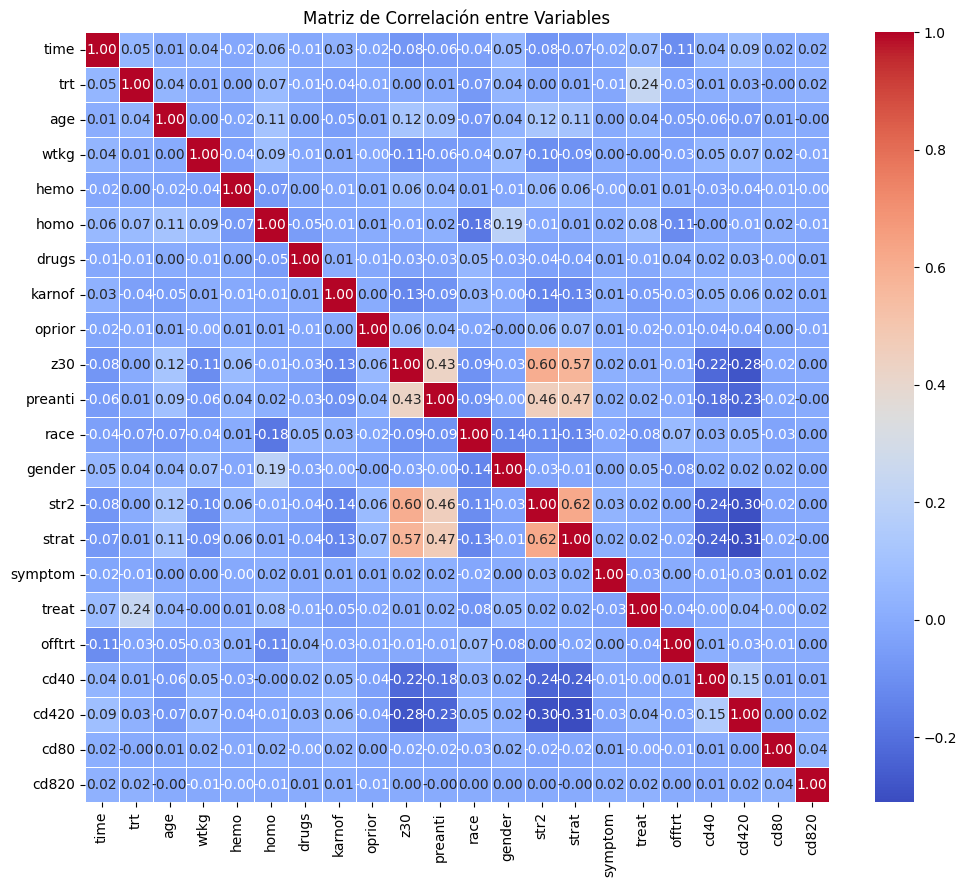

In [13]:
correlation_matrix = data_train.drop([target], axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()


## Distribución de la variable objetivo

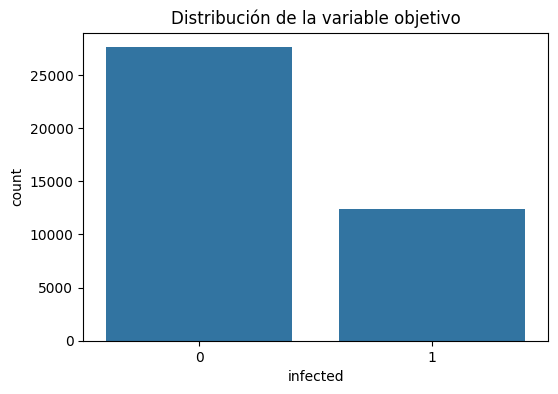

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='infected', data=data_train)
plt.title('Distribución de la variable objetivo')
plt.show()

La variable objetivo está desbalanceada, se empleará la técnica de SMOTE para solucionar esta limitación.

## Distribución de las variables predictoras

### Variables numéricas

In [15]:
num_var = ['time', 'age', 'wtkg', 'preanti', 'karnof', 'cd40', 'cd420', 'cd80', 'cd820']

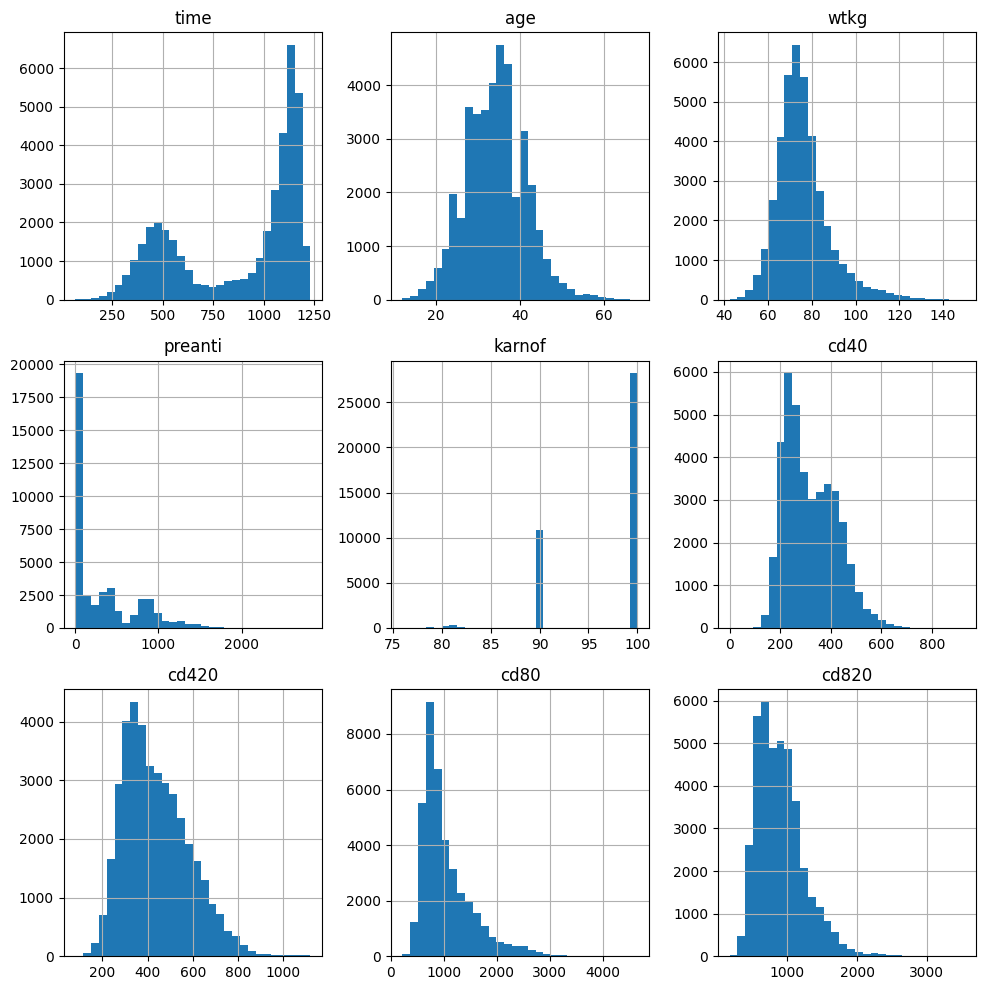

In [16]:
def plot_histograms(df, columns, bins=30, figsize=(10,10)):
  df[columns].hist(bins=bins, figsize=figsize)
  plt.tight_layout()
  plt.show()

plot_histograms(data_train, num_var)

- Dos picos en la variable `time`, se podría discretizar a dos grupos.
- `age`y `wtkg` con distribución normal como se esperaba.
- `preanti`: la mayoría de los pacientes recibieron durante poco tiempo tratamiento antirretrovirales previos. Unos pocos han estado más tiempo con tratamientos extra.
- `karnof`: paciente con buen estado funcional en general.
- variables histológicas: distribuciones asimétricas hacia la derecha.

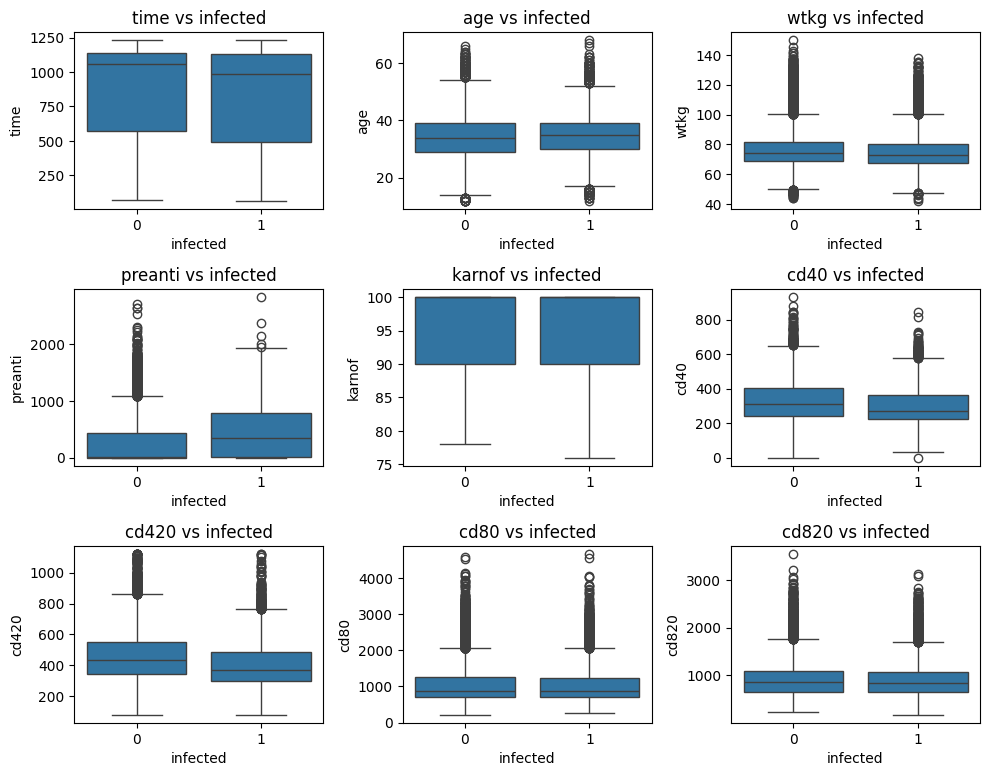

In [17]:
def plot_boxplots(df, columns, target, figsize=(10,10)):
  plt.figure(figsize=figsize)
  for i, col in enumerate(columns):
    plt.subplot(len(columns) // 3 + 1, 3, i+1)
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f'{col} vs {target}')
  plt.tight_layout()
  plt.show()

plot_boxplots(data_train, num_var, 'infected')

- En general, las distribuciones de las variables son similares entre los pacientes infectados y los no infectados.
- Mayor diferencia en la variable `preanti`, que ya se veía en el histograma que es muy asimétrica, siendo los pacientes no infectados los que tienden a tener valores más altos (llevan más tiempo con terapias antirretrovirales).
- Las variables histológicas son ligeramente más bajas en pacientes infectados. Puede indicar que son buenas varibales para predecir la infección.  

#### Análisis de la variable `time`


Dado que el histograma tenía dos picos, se categoriza la variable con un umbral en 750.

Comparación de 'time_class' con 'infected':
infected           0         1
time_class                    
0           0.632338  0.367662
1           0.722928  0.277072


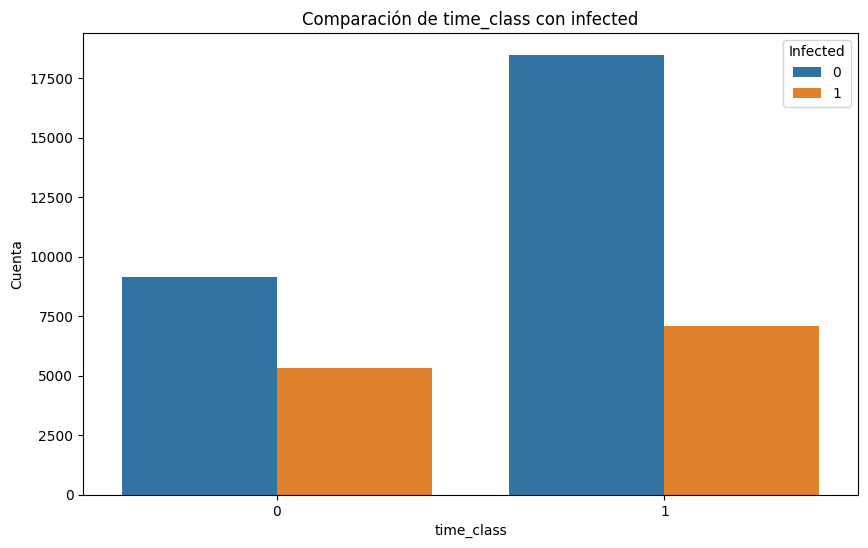

In [18]:
cutoff = 800
data_train['time_class'] = (data_train['time'] > cutoff).astype(int)
comparison = pd.crosstab(data_train['time_class'], data_train['infected'], normalize='index')
print("Comparación de 'time_class' con 'infected':")
print(comparison)

plt.figure(figsize=(10, 6))
sns.countplot(x='time_class', hue='infected', data=data_train)
plt.title('Comparación de time_class con infected')
plt.xlabel('time_class')
plt.ylabel('Cuenta')
plt.legend(title='Infected')
plt.show()

Parece que un seguimiento más largo puede estar relacionado con una menor proporción de infección. Puede ser que los pacientes infectados tienen una mortalidad mayor, luego el tiempo de seguimiento es menor.

#### Outliers

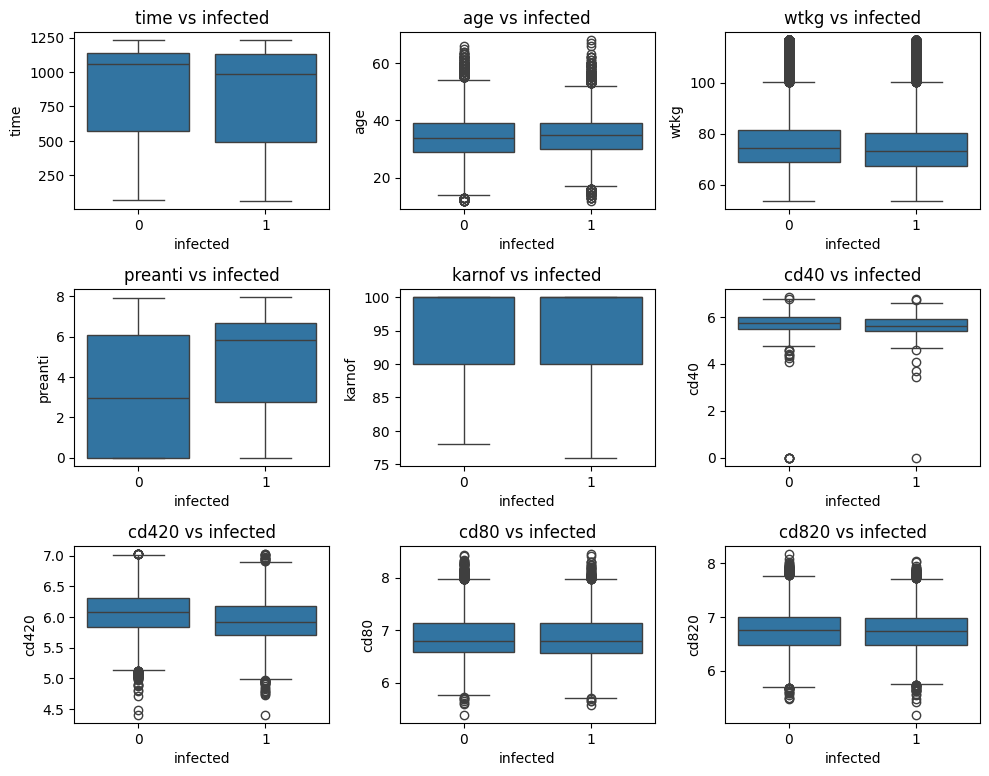

In [19]:
def log_transform(df, columns):
  df_log = df.copy()
  for col in columns:
    df_log[col] = np.log1p(df[col])
  return df_log

def cap_floor(df, columns, lower_percentile=1, upper_percentile=99):
  df_cap = df.copy()
  for col in columns:
    lower_bound = np.percentile(df_cap[col], lower_percentile)
    upper_bound = np.percentile(df_cap[col], upper_percentile)
    df_cap[col] = np.where(df_cap[col] < lower_bound, lower_bound, df_cap[col])
    df_cap[col] = np.where(df_cap[col] > upper_bound, upper_bound, df_cap[col])
  return df_cap

vars_to_log_transform = ['preanti', 'cd40', 'cd420', 'cd80', 'cd820']
vars_to_cap_floor = ['wtkg']

data_log_transformed = log_transform(data_train, vars_to_log_transform)
data_cleaned = cap_floor(data_log_transformed, vars_to_cap_floor)

plot_boxplots(data_cleaned, num_var, 'infected')

In [20]:
data_cleaned.head(2)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected,time_class
46973,383,2,42,72.63570,0,1,0,100,0,1,...,2,0,1,1,5.505332,5.620401,7.367077,6.895683,0,0
3260,1132,2,34,76.57195,0,1,0,100,0,1,...,2,0,1,0,5.389072,5.866468,6.923629,6.429719,0,1


### Variables categóricas

In [21]:
cat_var = ['trt', 'hemo', 'homo', 'drugs', 'race', 'gender', 'symptom', 'oprior', 'z30', 'str2', 'strat','treat', 'offtrt']

In [22]:
for col_name in cat_var:
  if data_train[col_name].nunique()<10:
    cat_counts = data_train[col_name].value_counts()
    print(cat_counts)
    print('__________________________________')

trt
0    14880
3    10772
2     8649
1     5699
Name: count, dtype: int64
__________________________________
hemo
0    38663
1     1337
Name: count, dtype: int64
__________________________________
homo
1    26064
0    13936
Name: count, dtype: int64
__________________________________
drugs
0    34694
1     5306
Name: count, dtype: int64
__________________________________
race
0    28226
1    11774
Name: count, dtype: int64
__________________________________
gender
1    34223
0     5777
Name: count, dtype: int64
__________________________________
symptom
0    36658
1     3342
Name: count, dtype: int64
__________________________________
oprior
0    38332
1     1668
Name: count, dtype: int64
__________________________________
z30
1    25604
0    14396
Name: count, dtype: int64
__________________________________
str2
1    22967
0    17033
Name: count, dtype: int64
__________________________________
strat
1    17397
3    14833
2     7770
Name: count, dtype: int64
___________________________

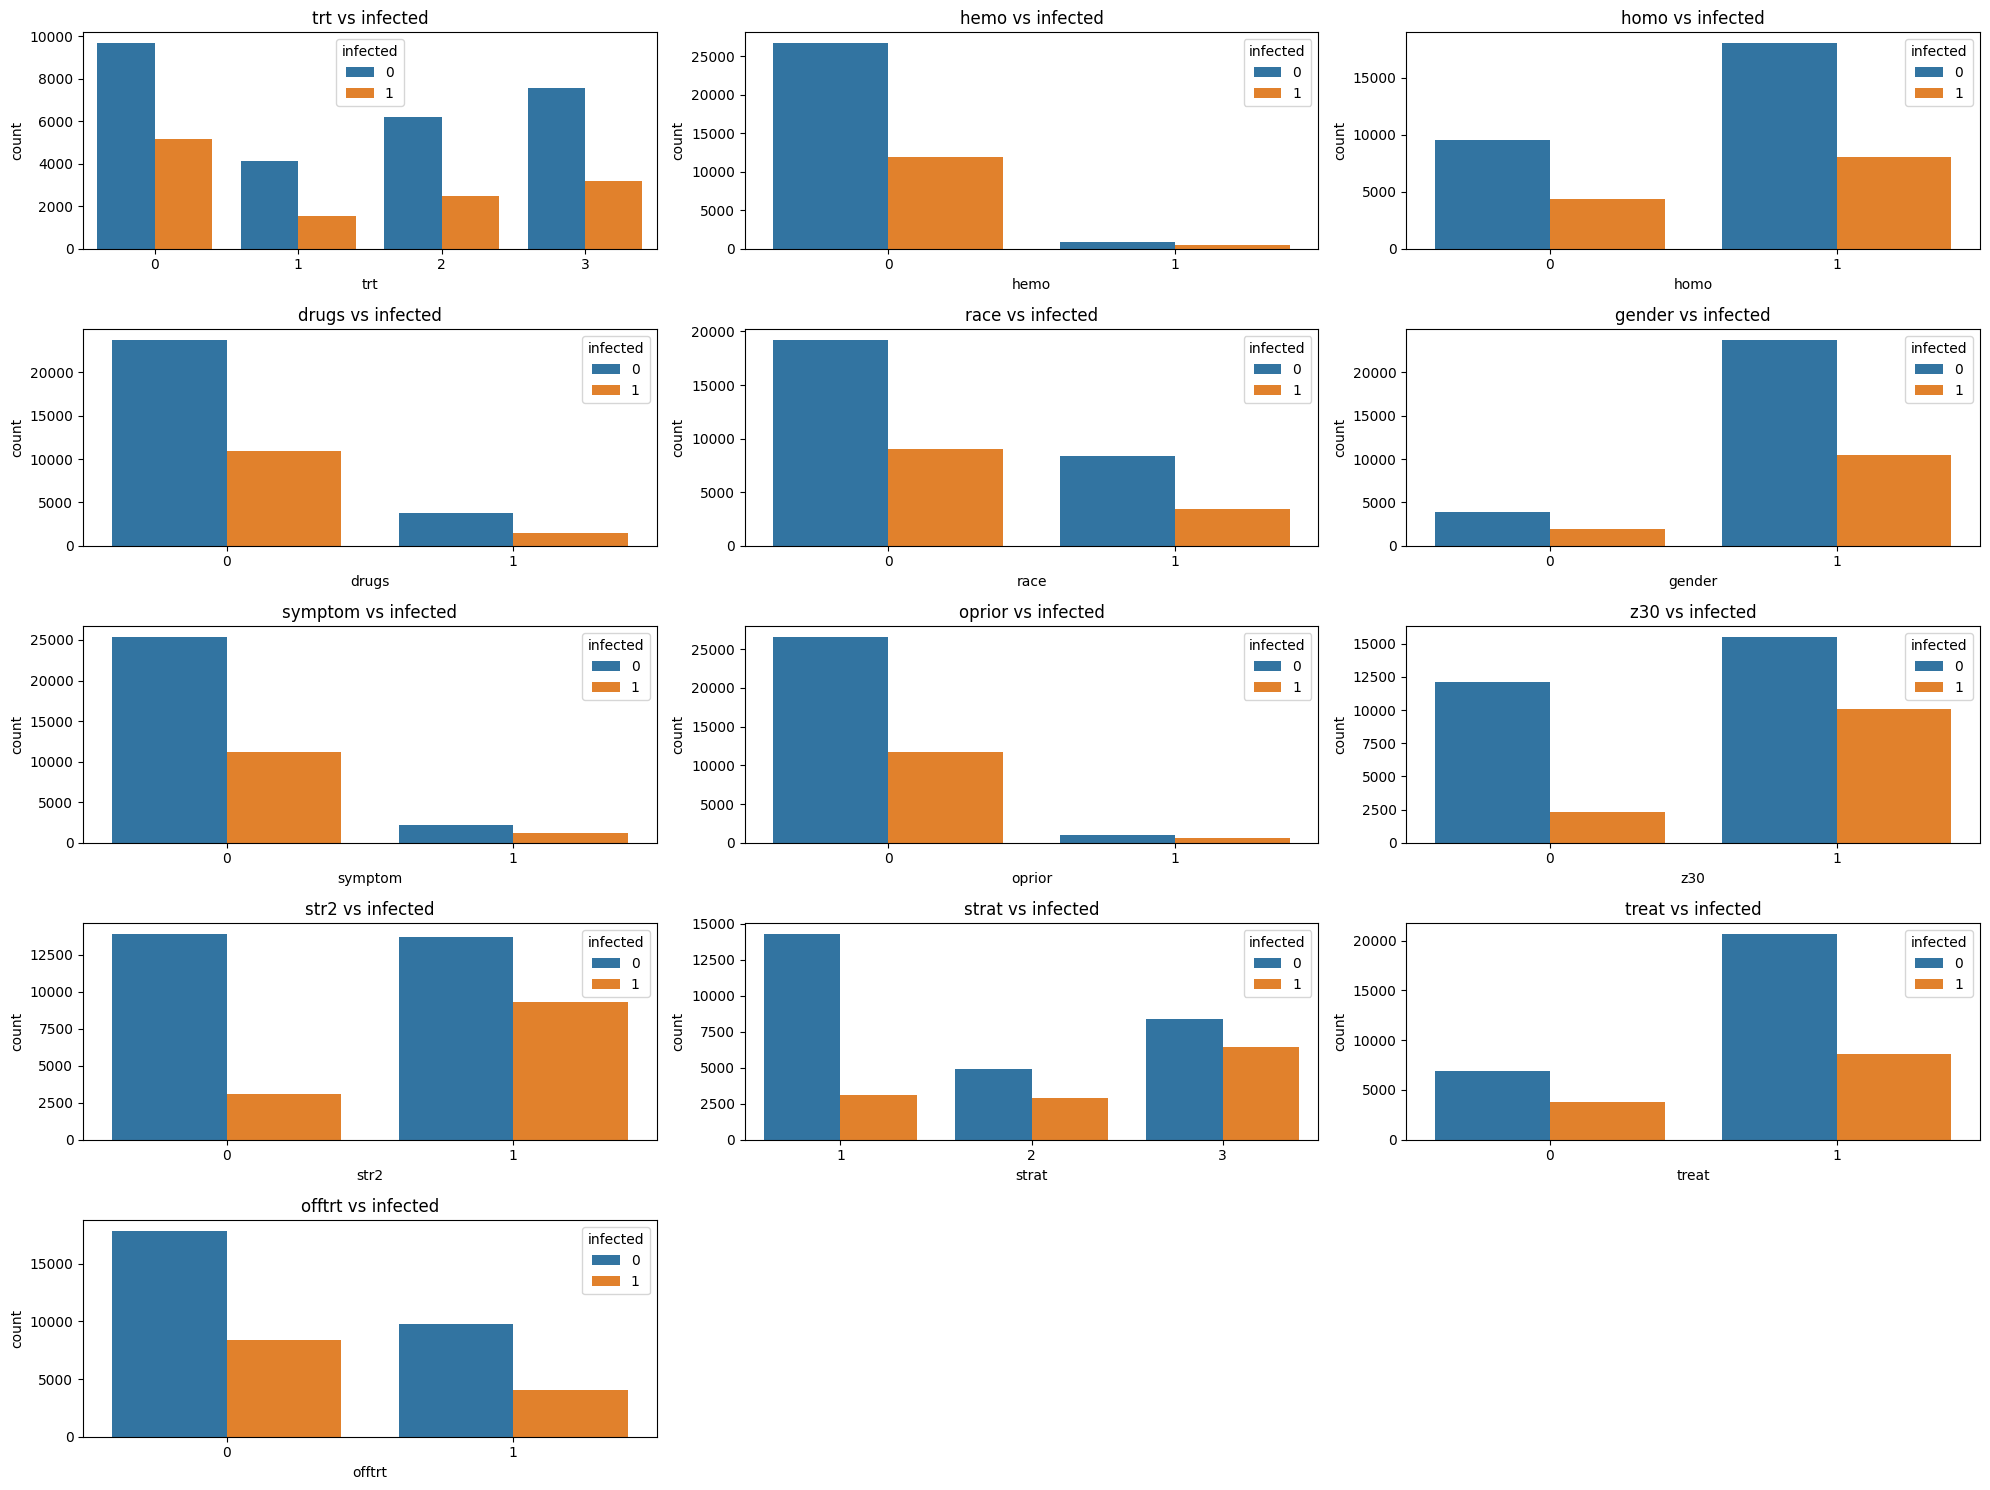


Tabla de Contingencia para trt vs infected:
infected         0         1
trt                         
0         0.652554  0.347446
1         0.726619  0.273381
2         0.714880  0.285120
3         0.703305  0.296695
All       0.690250  0.309750

Tabla de Contingencia para hemo vs infected:
infected         0         1
hemo                        
0         0.692574  0.307426
1         0.623037  0.376963
All       0.690250  0.309750

Tabla de Contingencia para homo vs infected:
infected         0         1
homo                        
0         0.684989  0.315011
1         0.693063  0.306937
All       0.690250  0.309750

Tabla de Contingencia para drugs vs infected:
infected         0         1
drugs                       
0         0.685709  0.314291
1         0.719940  0.280060
All       0.690250  0.309750

Tabla de Contingencia para race vs infected:
infected         0         1
race                        
0         0.681641  0.318359
1         0.710888  0.289112
All       0.6902

In [23]:
def contingency_tables(df, columns, target):
  for col in columns:
    print(f'\nTabla de Contingencia para {col} vs {target}:')
    print(pd.crosstab(df[col], df[target], margins=True, normalize='index'))

def plot_countplots(df, columns, target, figsize=(20, 15)):
  plt.figure(figsize=figsize)
  for i, col in enumerate(columns):
    plt.subplot(len(columns) // 3 + 1, 3, i + 1)
    sns.countplot(x=col, hue=target, data=df)
    plt.title(f'{col} vs {target}')
    plt.tight_layout()
  plt.show()

plot_countplots(data_train, cat_var, 'infected')
contingency_tables(data_train, cat_var, 'infected')

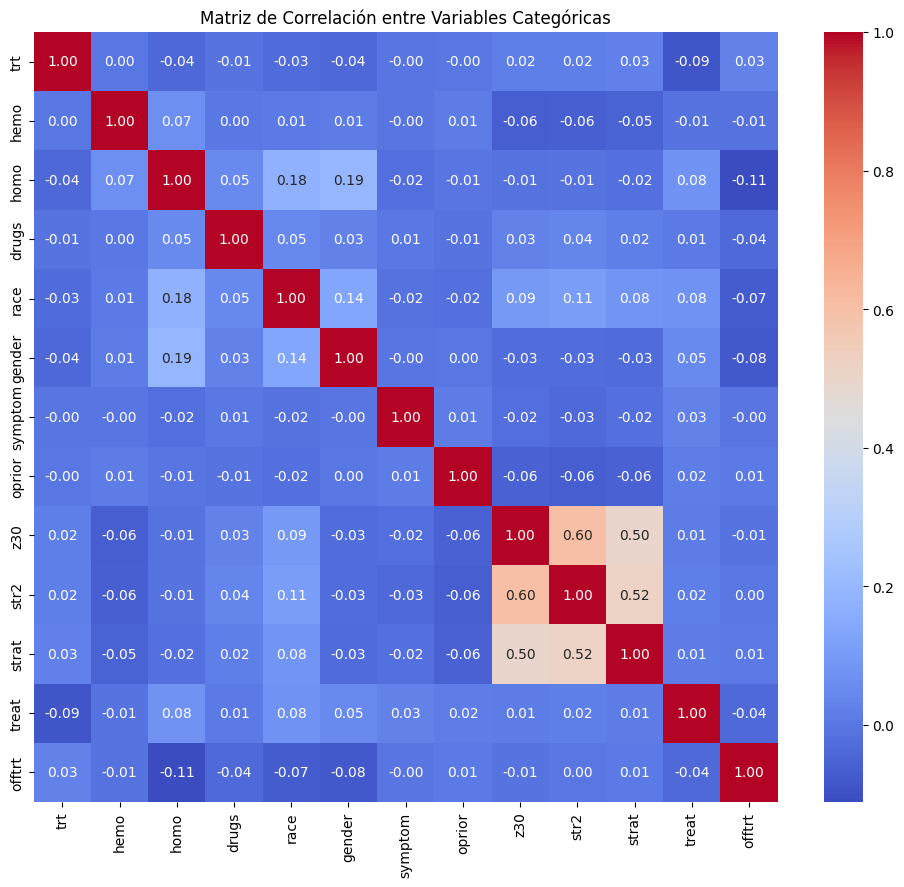

In [24]:
def plot_categorical_correlation_heatmap(df, columns):
  # Convertir variables categóricas a numéricas
  df_num = df[columns].apply(lambda x: pd.factorize(x)[0])
  corr = df_num.corr()

  plt.figure(figsize=(12, 10))
  sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
  plt.title('Matriz de Correlación entre Variables Categóricas')
  plt.show()

plot_categorical_correlation_heatmap(data_train, cat_var)

Se oberva cierta correlación entre las variables `strat`, `str2`, `z30`. Las tres variables hacen referencia al historial de terapias del paciente. Se debe estudiar más a fondo. También conviene estudiar la relación entre `treat` y `trt`.

#### Análisis `treat`y `trt`

Tabla de Contingencia entre 'trt' y 'treat':
treat     0     1
trt              
0      6256  8624
1      1036  4663
2      1507  7142
3      1848  8924


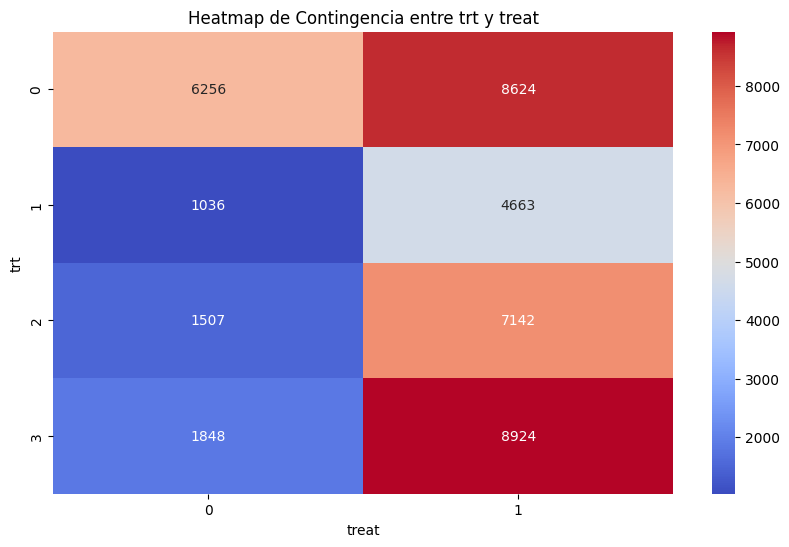

In [25]:
contingency_table = pd.crosstab(data_train['trt'], data_train['treat'])
print("Tabla de Contingencia entre 'trt' y 'treat':")
print(contingency_table)

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap de Contingencia entre trt y treat')
plt.xlabel('treat')
plt.ylabel('trt')
plt.show()

Aunque se ve que las clases 1,2,3 de `trt`se relacionan más con `treat` 1, no son completamente redundantes.

#### Análisis de `z30`, `str2`, `strat`.

In [26]:
contingency_z30_str2 = pd.crosstab(data_train['z30'], data_train['str2'])
contingency_z30_strat = pd.crosstab(data_train['z30'], data_train['strat'])
contingency_str2_strat = pd.crosstab(data_train['str2'], data_train['strat'])

print("Tabla de Contingencia entre 'z30' y 'str2':")
print(contingency_z30_str2)

print("\nTabla de Contingencia entre 'z30' y 'strat':")
print(contingency_z30_strat)

print("\nTabla de Contingencia entre 'str2' y 'strat':")
print(contingency_str2_strat)

Tabla de Contingencia entre 'z30' y 'str2':
str2      0      1
z30               
0     11857   2539
1      5176  20428

Tabla de Contingencia entre 'z30' y 'strat':
strat      1     2      3
z30                      
0      11963  1253   1180
1       5434  6517  13653

Tabla de Contingencia entre 'str2' y 'strat':
strat      1     2      3
str2                     
0      13624  1803   1606
1       3773  5967  13227


In [27]:
from sklearn.metrics import mutual_info_score
mi_z30_str2 = mutual_info_score(data_train['z30'], data_train['str2'])
mi_z30_strat = mutual_info_score(data_train['z30'], data_train['strat'])
mi_str2_strat = mutual_info_score(data_train['str2'], data_train['strat'])

print("\nInformación Mutua entre 'z30' y 'str2':", mi_z30_str2)
print("Información Mutua entre 'z30' y 'strat':", mi_z30_strat)
print("Información Mutua entre 'str2' y 'strat':", mi_str2_strat)


Información Mutua entre 'z30' y 'str2': 0.19223470739316878
Información Mutua entre 'z30' y 'strat': 0.1945054679419737
Información Mutua entre 'str2' y 'strat': 0.2222852989668909


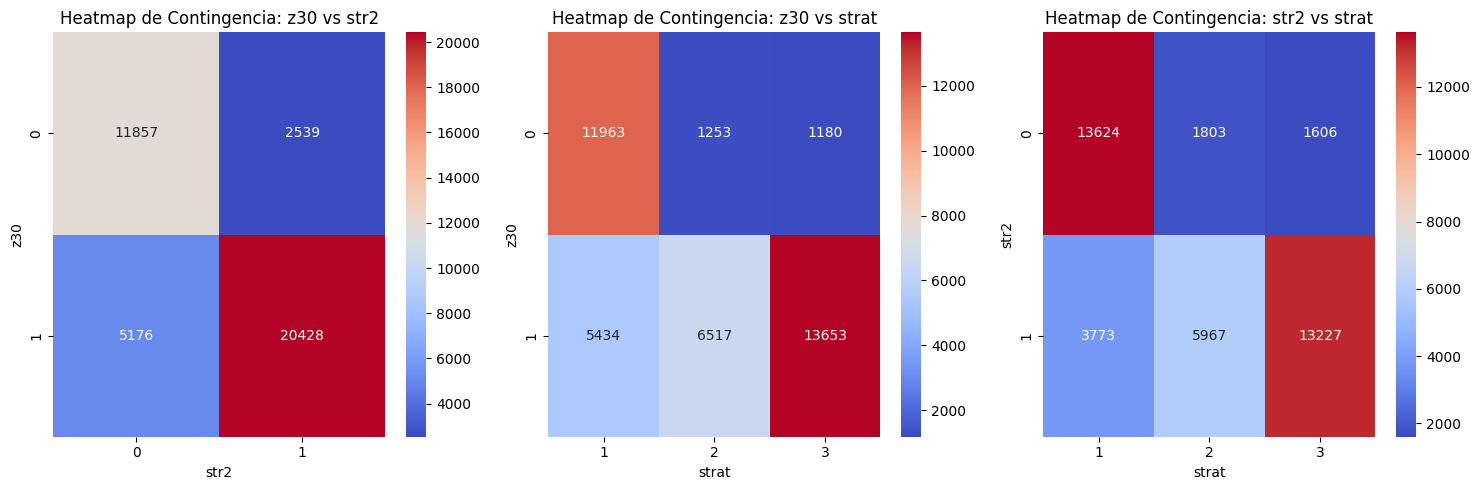

In [28]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(contingency_z30_str2, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap de Contingencia: z30 vs str2')

plt.subplot(1, 3, 2)
sns.heatmap(contingency_z30_strat, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap de Contingencia: z30 vs strat')

plt.subplot(1, 3, 3)
sns.heatmap(contingency_str2_strat, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap de Contingencia: str2 vs strat')

plt.tight_layout()
plt.show()

La dependencia se considera alta pero no lo suficiente como para eliminar en este punto ninguna de las variables, con el estudio posterior esta dependencia moderada se tendrá en cuenta.

# Modelos

En el EDA se han realizado diversos cambios:
- creación de la variable `time_class`.
- manejo de outliers en las variables histológicas, `preanti` y en `wtkg`.

## Preparación de los datos

In [29]:
data['time_class'] = (data['time'] > cutoff).astype(int)

In [30]:
vars_to_log_transform = ['preanti', 'cd40', 'cd420', 'cd80', 'cd820']
vars_to_cap_floor = ['wtkg']

data_log_transformed = log_transform(data, vars_to_log_transform)
data_cleaned = cap_floor(data_log_transformed, vars_to_cap_floor)

In [31]:
X = data_cleaned.drop(columns=target)
y = data_cleaned[target]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

## Random Forest

In [ ]:
# !pip install shap

In [ ]:
# import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

rf = RandomForestClassifier()
rfe = RFE(estimator=rf, n_features_to_select=15, step=1)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      6899
           1       0.46      0.46      0.46      3101

    accuracy                           0.66     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.66      0.66      0.66     10000



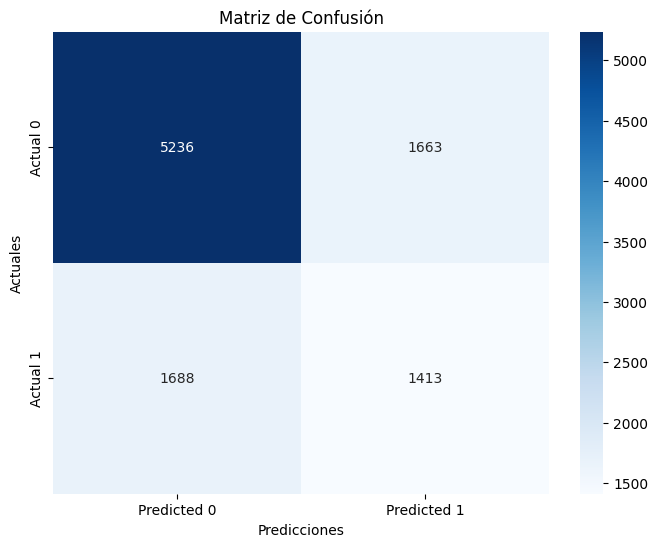

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicciones')
plt.ylabel('Actuales')
plt.title('Matriz de Confusión')
plt.show()

El primer modelo de RF tiene una precisión del 67%. El modelo tiene un buen desempeño en la detección de no infectados (clase 0). Sin embargo, tiene problemas para detectar los pacientes infectados.

Vemos las variables más relevantes según este primer modelo de RF

In [ ]:
rfe.fit(X_train_res, y_train_res)
selected_features_rfe = X.columns[rfe.support_]

print("Características Seleccionadas por RFE:")
print(selected_features_rfe)

Características Seleccionadas por RFE:
Index(['time', 'trt', 'age', 'wtkg', 'homo', 'karnof', 'preanti', 'race',
       'strat', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rf, threshold='mean')
sfm.fit(X_train, y_train)

selected_features_sfm = X.columns[sfm.get_support()]
print("Características Seleccionadas por SelectFromModel:")
print(selected_features_sfm)

Características Seleccionadas por SelectFromModel:
Index(['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820'], dtype='object')


In [ ]:
# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(X_train_res)

# shap.summary_plot(shap_values, X_train_res, feature_names=X.columns)

## XGBoost

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      6899
           1       0.44      0.48      0.46      3101

    accuracy                           0.65     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.66      0.65      0.66     10000



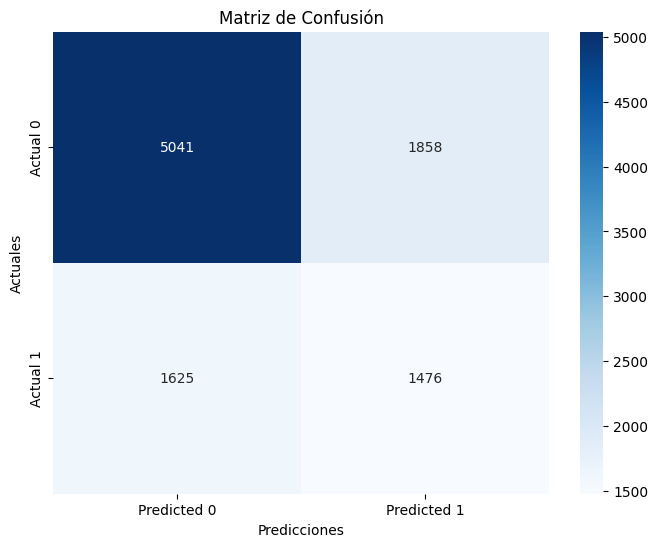

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicciones')
plt.ylabel('Actuales')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
feature_importances = xgb_model.feature_importances_
features = data_cleaned.drop(columns=['infected']).columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Importancia de Características:")
print(importance_df)

Importancia de Características:
       Feature  Importance
16       treat    0.166690
17      offtrt    0.106820
6        drugs    0.074502
14       strat    0.071260
11        race    0.065508
10     preanti    0.062214
12      gender    0.059846
5         homo    0.054165
15     symptom    0.046545
1          trt    0.041687
4         hemo    0.035536
8       oprior    0.029228
19       cd420    0.022634
9          z30    0.021684
18        cd40    0.019607
7       karnof    0.017571
0         time    0.017555
13        str2    0.016332
21       cd820    0.015775
20        cd80    0.014912
3         wtkg    0.014052
2          age    0.013326
22  time_class    0.012550


## Selección de variables


In [35]:
selected_var = ['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820', 'strat', 'treat', 'race', 'gender', 'drugs', 'homo', 'offtrt']

In [ ]:
data_cleaned.head(2)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected,time_class
0,1073,1,37,79.46339,0,1,0,100,0,1,...,2,0,1,0,5.777652,6.152733,6.783325,6.626718,1,1
1,324,0,33,73.02314,0,1,0,90,0,1,...,3,1,1,1,5.129899,6.356108,6.943122,7.330405,1,0


In [36]:
X = data_cleaned[selected_var]
y = data_cleaned['infected']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

## NN_1

Primera red neuronal de clasificación binaria con una primera capa densa con número de neuronas igual al tamaño de la entrada, seguido de un número a determinar de más capas densas (2 por defecto) con dropout entre cada una de ellas de 0.5 por defecto.

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

input_len = X_train_res.shape[1]
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


def make_model_1(dense_layers = 2
               , input_dim = input_len
               , dense_units = 64
               , dense_dropout = 0.5
               , RMS = 0.00001
               , verbose = False
               , l2_reg = 0.01):

    model = Sequential()

    model.add(Dense(units=input_dim,
                    kernel_initializer='normal',
                    activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(l2_reg),
                    input_dim=input_dim))
    model.add(Dropout(dense_dropout))

    for i in range(0,dense_layers):
        model.add(Dense(units = dense_units
                        , kernel_initializer='normal'
                        , activation='relu'
                        , kernel_regularizer = tf.keras.regularizers.l2(l2_reg)))
        model.add(Dropout(dense_dropout))

    model.add(Dense(1, activation = 'sigmoid'))

    optimizer = optimizers.Adam(learning_rate = RMS)

    model.compile(optimizer = optimizer
                  , loss = 'binary_crossentropy'
                  , metrics = ['accuracy'])

    return model



In [ ]:
model_nn_1 = make_model_1(RMS = 0.0001, dense_dropout=0.3, dense_layers = 2 )

history = model_nn_1.fit(X_train_res, y_train_res, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=0, callbacks = [early_stopping])

In [ ]:
loss, accuracy = model_nn_1.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy en el conjunto de prueba: {accuracy:.4f}')

Accuracy en el conjunto de prueba: 0.6524


In [ ]:
y_pred_prob = model_nn_1.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

313/313 [==============================] - 1s 2ms/step


Matriz de Confusión:

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.76      0.71      0.74      6861
           1       0.45      0.52      0.48      3139

    accuracy                           0.65     10000
   macro avg       0.61      0.62      0.61     10000
weighted avg       0.67      0.65      0.66     10000



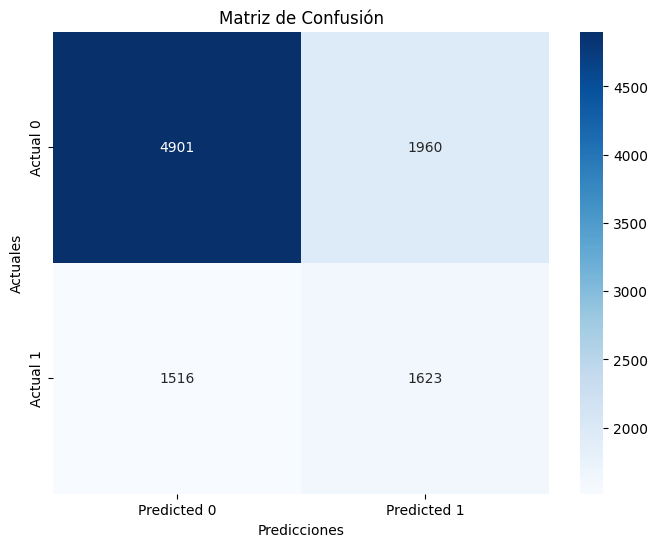

In [ ]:
print("Matriz de Confusión:")
cm_nn = confusion_matrix(y_test, y_pred)

print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicciones')
plt.ylabel('Actuales')
plt.title('Matriz de Confusión')
plt.show()

Text(0.5, 1.0, 'Pérdida durante el entrenamiento')

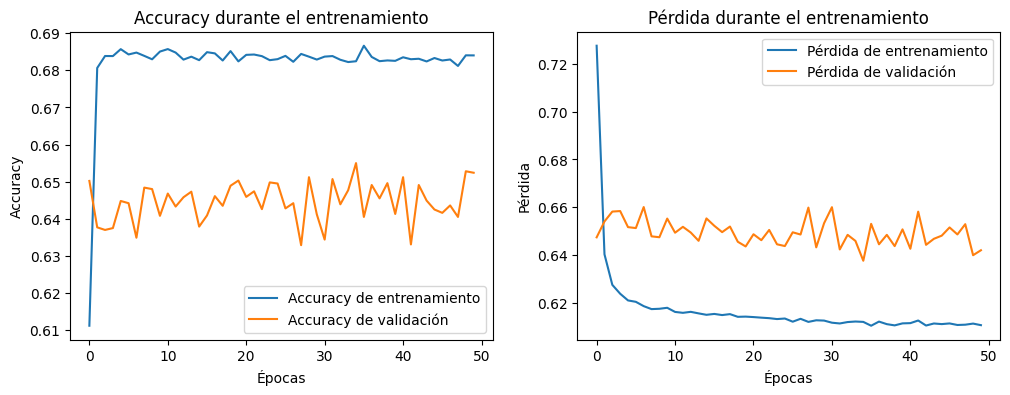

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy de validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy durante el entrenamiento')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')

La accuracy de entrenamiento es superior a la de validación, se está produciendo sobreajuste. Además, la accuracy se estanca en un 65%, no consigue generalizar. Se va a realizar un análisis para mejorar el modelo optimizando sus hiperparámetros. Entre los parámetros que se van a estudiar, en primer lugar se variará el ratio de aprendizaje

#### Learning rate GridSearch

Evaluando learning rate: 0.0001
Accuracy en el conjunto de prueba: 0.6414


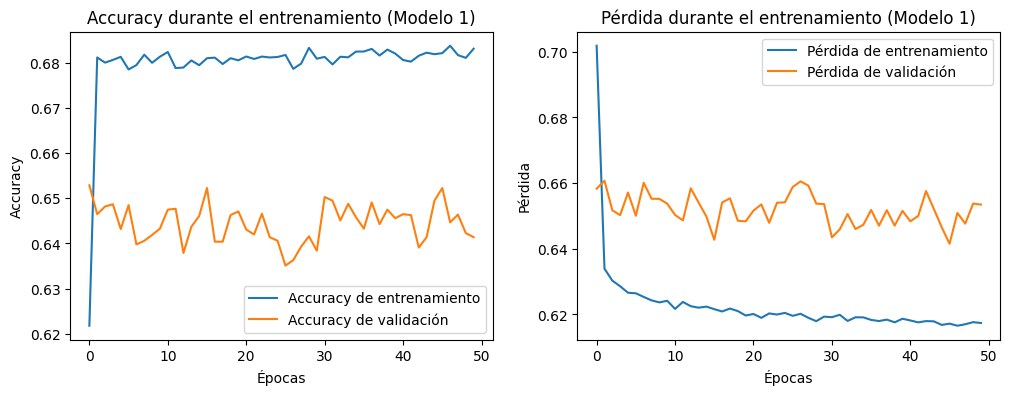

Evaluando learning rate: 1e-05
Accuracy en el conjunto de prueba: 0.6448


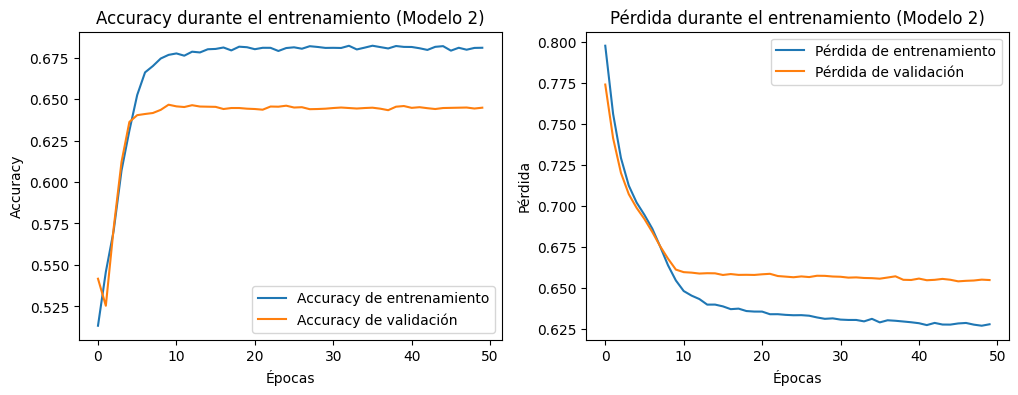

Mejor Learning Rate: 1e-05 con Accuracy: 0.6448


In [ ]:
learning_rates = [0.0001, 0.00001]

best_learning_rate = None
best_accuracy_lr = 0

model_index = 1
for lr in learning_rates:
    print(f"Evaluando learning rate: {lr}")

    # Crear el modelo con el learning rate actual
    model_gs = make_model_1(RMS=lr, input_dim=X_train_res.shape[1])

    # Entrenar el modelo
    history = model_gs.fit(X_train_res, y_train_res, epochs=50, batch_size=32,
                        validation_data=(X_test, y_test), verbose=0)

    # Evaluar el modelo en el conjunto de prueba
    loss, accuracy = model_gs.evaluate(X_test, y_test, verbose=0)
    print(f'Accuracy en el conjunto de prueba: {accuracy:.4f}')

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy de entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Accuracy de validación')
    plt.xlabel('Épocas')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Accuracy durante el entrenamiento (Modelo {model_index})')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.title(f'Pérdida durante el entrenamiento (Modelo {model_index})')
    plt.show()

    # Guardar el mejor learning rate
    if accuracy > best_accuracy_lr:
        best_accuracy_lr = accuracy
        best_learning_rate = lr

    model_index += 1

print(f"Mejor Learning Rate: {best_learning_rate} con Accuracy: {best_accuracy_lr:.4f}")


En el primer caso, con un learning rate mayor, principalmente destaca la fluctuación de la función de pérdida de validación, el modelo no generaliza bien, se está produciendo overfitting. Para un learning rate menor, el valor en el que se estabilizan las accuracy es igual y las curvas son más estables. La estabilidad puede estar favoreciendo a que el modelo generalice mejor. La convergencia podemos observar que es más lenta en este caso, es más gradual. Este hecho junto con la mayor estabilidad hace que el ratio de aprendizaje más adecuado sea el menor.

#### Dense Layers GridSearch

Evaluando número de capas densas: 1
Accuracy en el conjunto de prueba: 0.6478


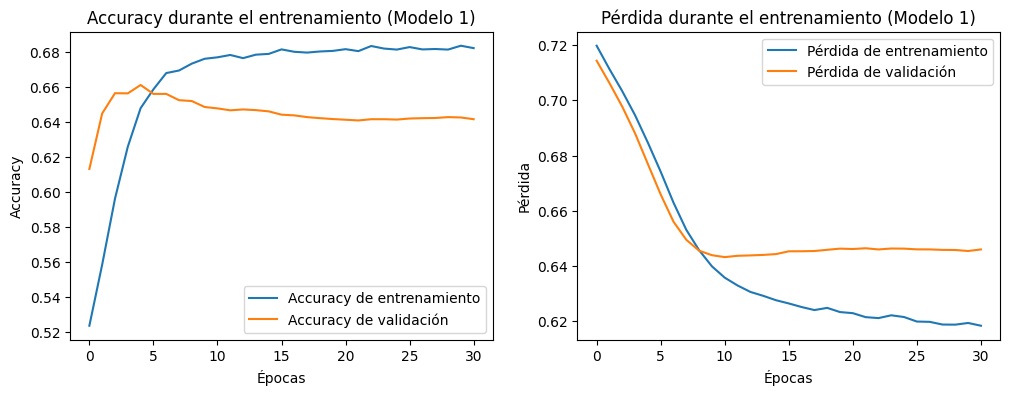

Evaluando número de capas densas: 2
Accuracy en el conjunto de prueba: 0.6463


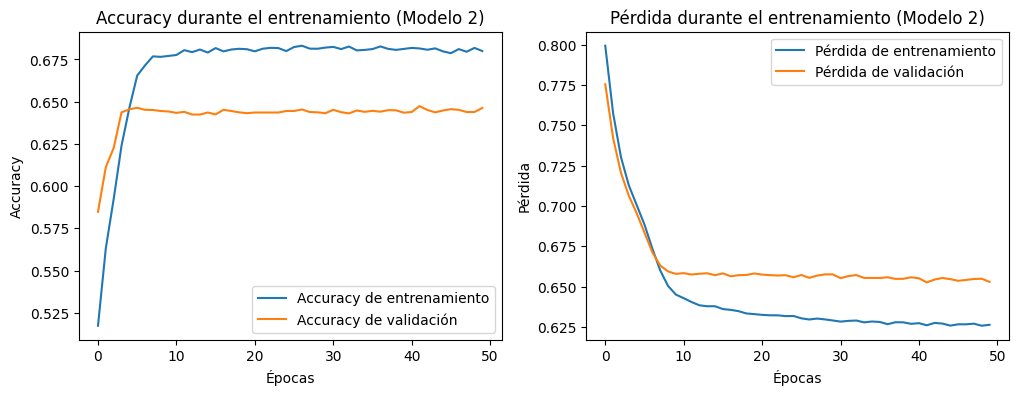

Evaluando número de capas densas: 3
Accuracy en el conjunto de prueba: 0.6861


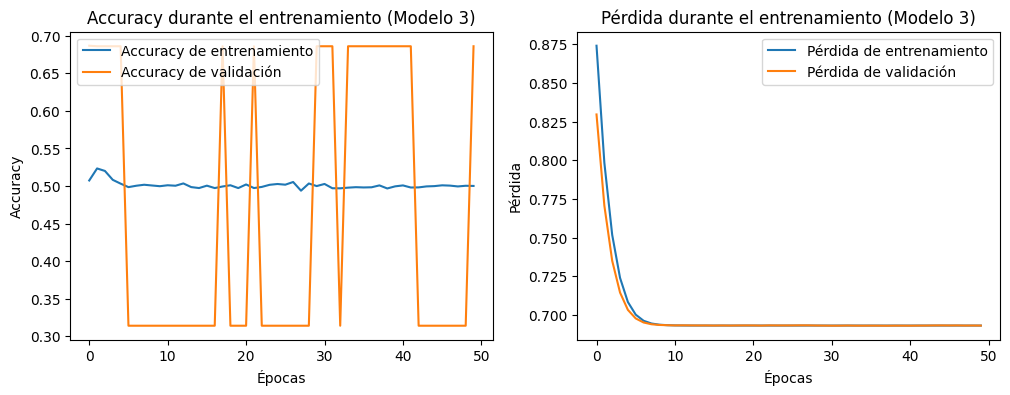

Mejor Número de Capas Densas: 3 con Accuracy: 0.6861


In [ ]:
dense_layers_list = [1, 2, 3]
best_learning_rate = 0.00001
best_dense_layers = None
best_accuracy_dl = 0
model_index = 1
for layers in dense_layers_list:
    print(f"Evaluando número de capas densas: {layers}")

    model_gs = make_model_1(RMS=best_learning_rate, dense_layers=layers, input_dim=X_train_res.shape[1])

    history = model_gs.fit(X_train_res, y_train_res, epochs=50, batch_size=32,
                        validation_data=(X_test, y_test), verbose=0, callbacks=[early_stopping])

    loss, accuracy = model_gs.evaluate(X_test, y_test, verbose=0)
    print(f'Accuracy en el conjunto de prueba: {accuracy:.4f}')

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy de entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Accuracy de validación')
    plt.xlabel('Épocas')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Accuracy durante el entrenamiento (Modelo {model_index})')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.title(f'Pérdida durante el entrenamiento (Modelo {model_index})')
    plt.show()

    if accuracy > best_accuracy_dl:
        best_accuracy_dl = accuracy
        best_dense_layers = layers

    model_index += 1

print(f"Mejor Número de Capas Densas: {best_dense_layers} con Accuracy: {best_accuracy_dl:.4f}")


La comparación de los dos primeros casos, en el que solo se añade una capa densa y el segundo caso en el que se añaden dos, se puede observar que hay una mayor estabilidad para la segunda prueba. Los valores en los que se estabiliza la accuracy no difieren significativamente de la primera prueba (1 capa densa) y sin embargo, la convergencia es más rápida y la estabilidad es mayor. Por lo tanto, seleccionamos el segundo modelo de dos capas densas.
Respecto al tercer caso en el que se añaden 3 capas densas, podemos obervar que la accuracy de entrenamiento disminuye respecto a los anteriores y la de validación es extremadamente inestable.

Por lo tanto, para esta primera estructura, **los hiperparámetros más adecuados son un learning rate de 1e-5 con una arquitectura con 3 capas densas** (la primera con número de neuronas igual al tamaño del input y las dos capas consecutivas). Para mejorar el modelo se debería de regular también el tamaño de batch y el dropout, entre otros hiperparámetros.

Los resultados de la predicción con esta red son los representados en la primera prueba de la red neuronal.

## NN_2

Tras estudiar la primera arquitectura, en general los resultados tendían a ser inestables. Para mejorar la eficiencia y la estabilidad del entrenamineto de la red, se añaden capas de BatchNormalization tras las capas densas. Estas capas normalizan la salida de la capa densa. Entre los efectos que se esperan, destaca la regularización y por lo tanto una mayor estabilidad (al normalizar activaciones se reduce la dependencia a la inicialización de los pesos). Este aumento de estabilidad también puede afectar en términos de overfitting ya que se reduce la varibilidad en la actualización de los parámetros.

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [39]:


input_len = X_train_res.shape[1]
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


def make_model_2(dense_layers = 2
               , input_dim = input_len
               , dense_units = 64
               , dense_dropout = 0.5
               , RMS = 0.00001
               , verbose = False
               , l2_reg = 0.01):

    model = Sequential()

    model.add(Dense(units=input_dim,
                    kernel_initializer='normal',
                    activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(l2_reg),
                    input_dim=input_dim))
    model.add(BatchNormalization())
    model.add(Dropout(dense_dropout))

    for i in range(0,dense_layers):
        model.add(Dense(units = dense_units
                        , kernel_initializer='normal'
                        , activation='relu'
                        , kernel_regularizer = tf.keras.regularizers.l2(l2_reg)))
        model.add(BatchNormalization())
        model.add(Dropout(dense_dropout))

    model.add(Dense(1, activation = 'sigmoid'))

    optimizer = optimizers.Adam(learning_rate = RMS)

    model.compile(optimizer = optimizer
                  , loss = 'binary_crossentropy'
                  , metrics = ['accuracy'])

    return model


#### GridSearch de NN_2


Para esta red, se establece un ratio de aprendizaje de 1e-5 y se estudian las posibles combinaciones de número de capas y tamaño de batch.

Evaluando batch size: 32, dense layers: 2, learning rate: 1e-05
Accuracy en el conjunto de prueba: 0.6427


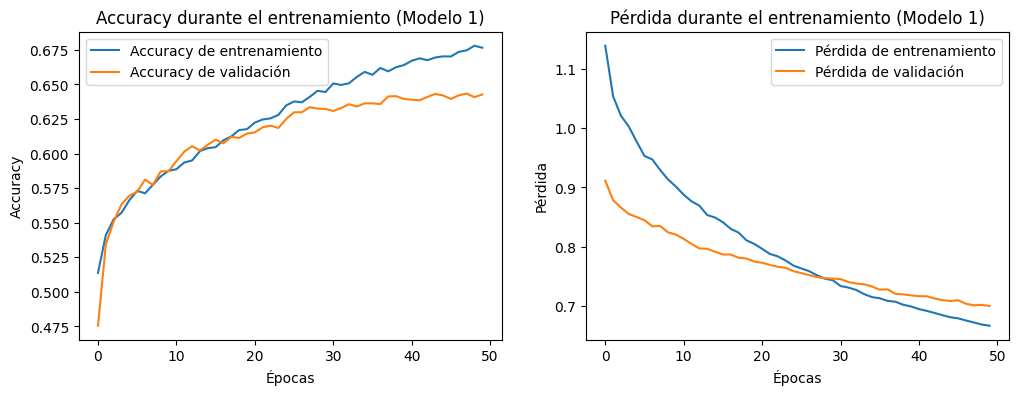

Evaluando batch size: 32, dense layers: 4, learning rate: 1e-05
Accuracy en el conjunto de prueba: 0.6413


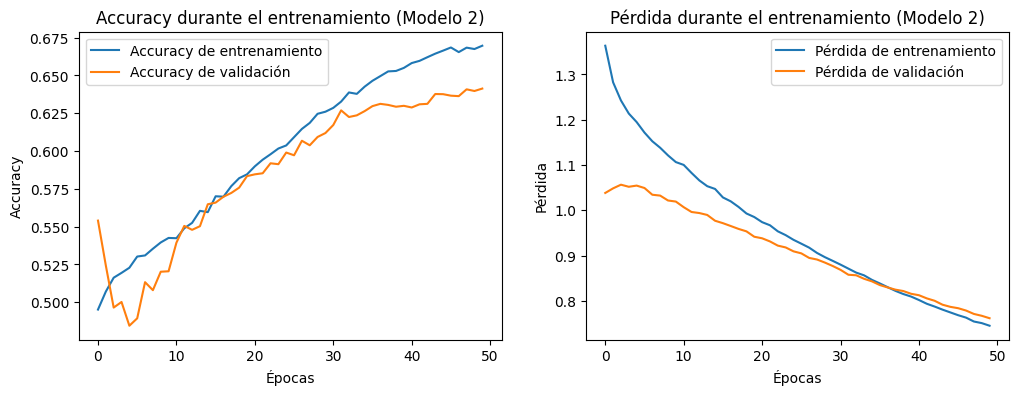

Evaluando batch size: 32, dense layers: 6, learning rate: 1e-05
Accuracy en el conjunto de prueba: 0.5687


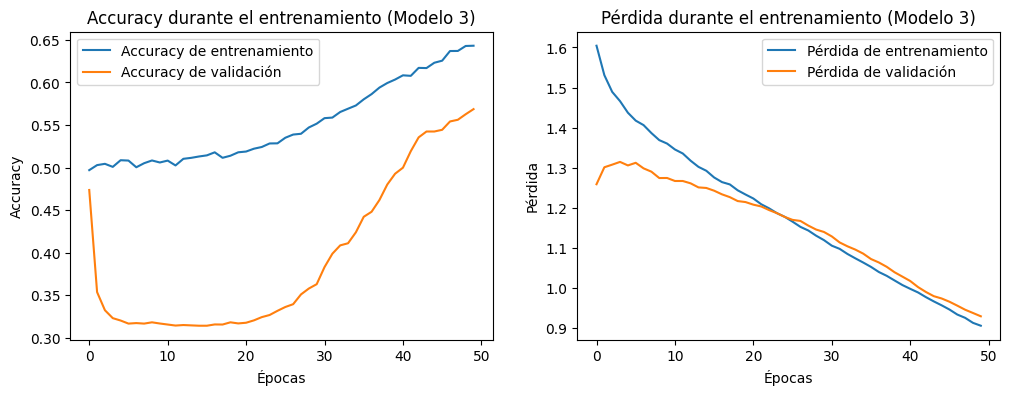

Evaluando batch size: 64, dense layers: 2, learning rate: 1e-05
Accuracy en el conjunto de prueba: 0.6124


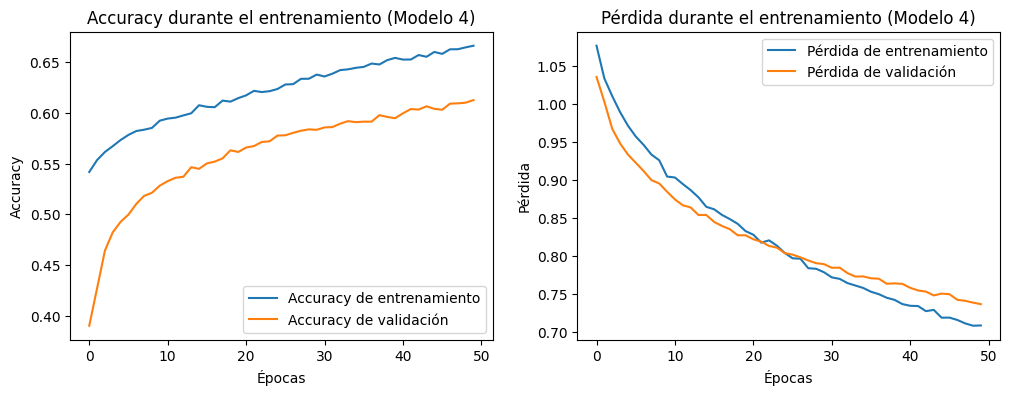

Evaluando batch size: 64, dense layers: 4, learning rate: 1e-05
Accuracy en el conjunto de prueba: 0.5714


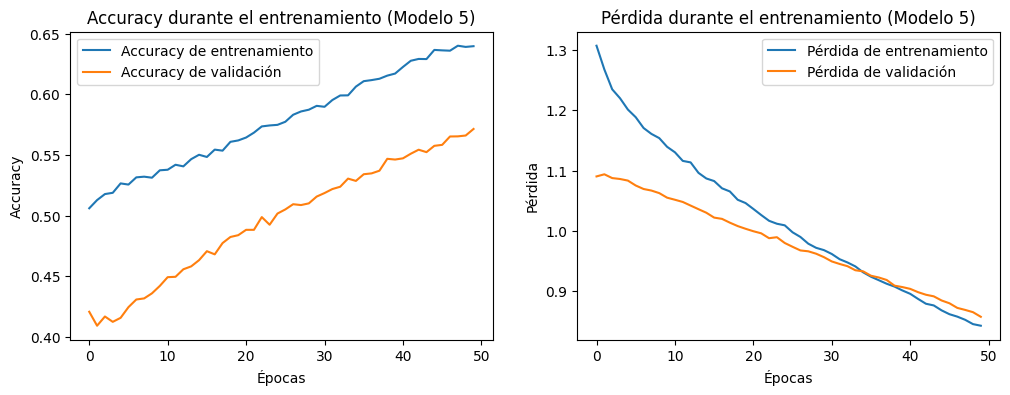

Evaluando batch size: 64, dense layers: 6, learning rate: 1e-05
Accuracy en el conjunto de prueba: 0.3933


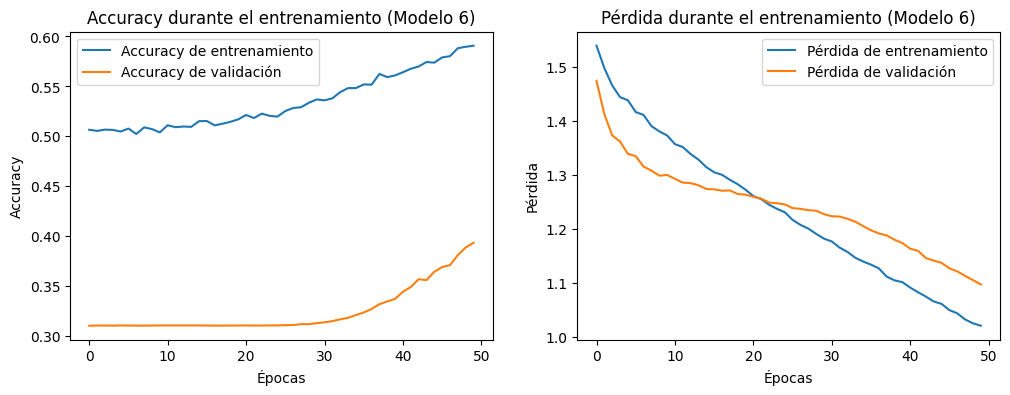

Evaluando batch size: 128, dense layers: 2, learning rate: 1e-05
Accuracy en el conjunto de prueba: 0.6178


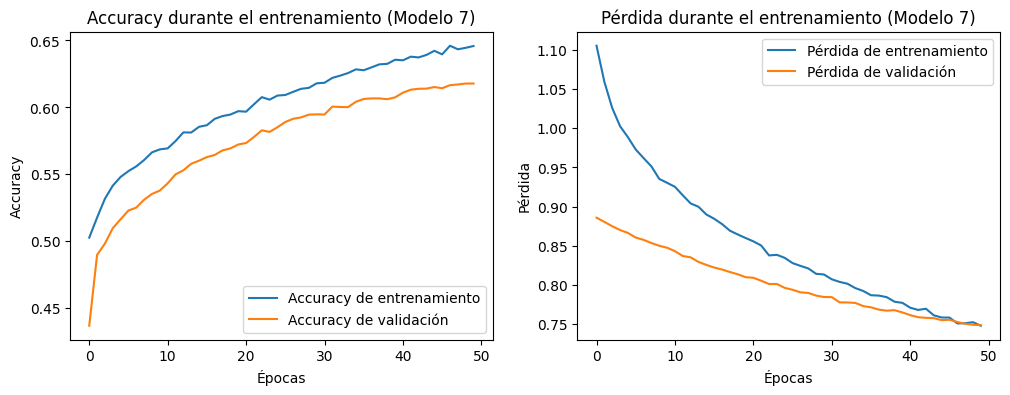

Evaluando batch size: 128, dense layers: 4, learning rate: 1e-05
Accuracy en el conjunto de prueba: 0.5716


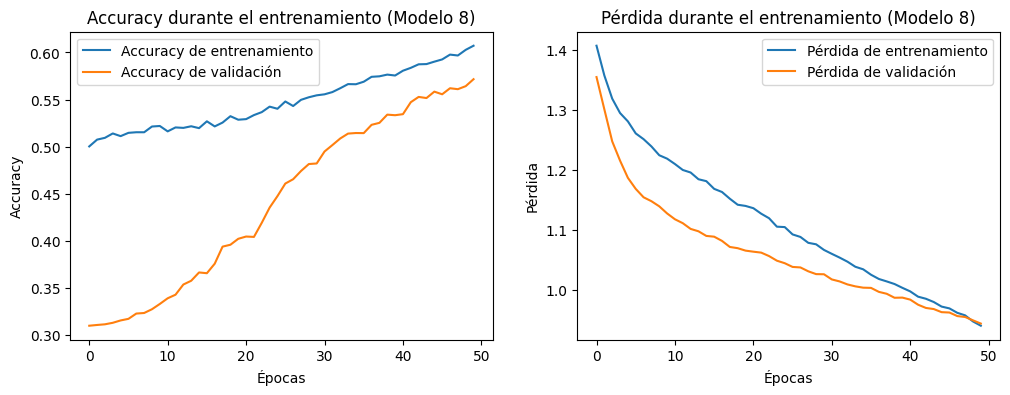

Evaluando batch size: 128, dense layers: 6, learning rate: 1e-05
Accuracy en el conjunto de prueba: 0.3101


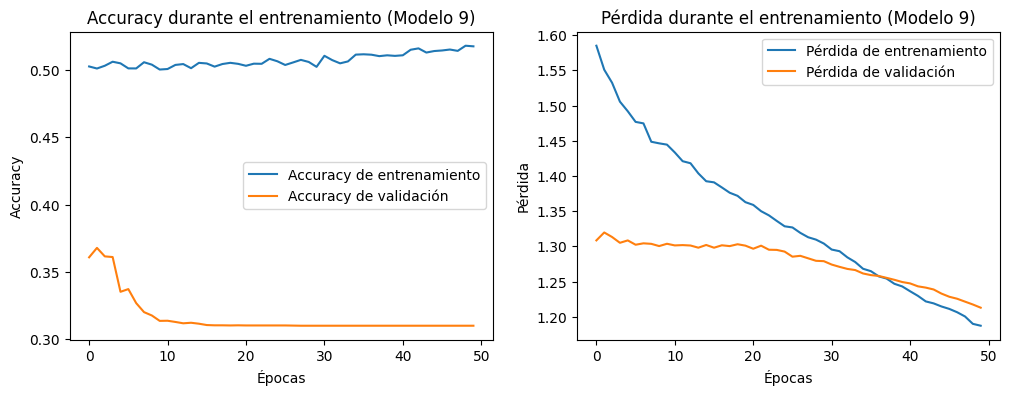

Mejores parámetros: {'batch_size': 32, 'dense_layers': 2, 'learning_rate': 1e-05} con Accuracy: 0.6427


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Definimos los parámetros a evaluar
batch_sizes = [32, 64, 128]
dense_layers = [2, 4, 6]
learning_rates = [0.00001]

# Inicializamos variables para guardar el mejor resultado
best_accuracy = 0
best_params = {}

model_index = 1
for batch_size in batch_sizes:
    for layers in dense_layers:
        for lr in learning_rates:
            print(f"Evaluando batch size: {batch_size}, dense layers: {layers}, learning rate: {lr}")

            # Crear el modelo con los parámetros actuales
            model_gs = make_model_2(dense_layers=layers, input_dim=X_train_res.shape[1], RMS=lr)

            # Callbacks
            early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
            lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15)

            # Entrenar el modelo
            history = model_gs.fit(X_train_res, y_train_res, epochs=50, batch_size=batch_size,
                                validation_data=(X_test, y_test), verbose=0,
                                callbacks=[early_stopping, lr_scheduler])

            # Evaluar el modelo en el conjunto de prueba
            loss, accuracy = model_gs.evaluate(X_test, y_test, verbose=0)
            print(f'Accuracy en el conjunto de prueba: {accuracy:.4f}')

            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.plot(history.history['accuracy'], label='Accuracy de entrenamiento')
            plt.plot(history.history['val_accuracy'], label='Accuracy de validación')
            plt.xlabel('Épocas')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.title(f'Accuracy durante el entrenamiento (Modelo {model_index})')

            plt.subplot(1, 2, 2)
            plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
            plt.plot(history.history['val_loss'], label='Pérdida de validación')
            plt.xlabel('Épocas')
            plt.ylabel('Pérdida')
            plt.legend()
            plt.title(f'Pérdida durante el entrenamiento (Modelo {model_index})')
            plt.show()

            # Guardar el mejor resultado
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'batch_size': batch_size,
                    'dense_layers': layers,
                    'learning_rate': lr
                }

            model_index += 1

print(f"Mejores parámetros: {best_params} con Accuracy: {best_accuracy:.4f}")



**batch size: 32, dense layers: 2, learning rate: 1e-05. Accuracy en el conjunto de prueba: 0.6427**
El resultado es bueno, la accuracy es similar a los resultados de la red 1. La precisión aumneta en el entrenamiento y en la validación con una tendencia estable. Respecto a la función de pérdida se estabiliza a niveles similares en ambos datasets.

**batch size: 32, dense layers: 4, learning rate: 1e-05. Accuracy en el conjunto de prueba: 0.6413** La función de pérdida se reduce menos, pero la accuracy es similar al modelo anterior.

**batch size: 32, dense layers: 6, learning rate: 1e-05. Accuracy en el conjunto de prueba: 0.5687** La precisión es significativamente más baja y fluctuante. Las funciones de pérdida también muestran notables fluctuaciones.


**batch_size=64, dense_layers=2. Accuracy en el conjunto de prueba: 61.2%** La precisión aumenta de manera estable y se estabiliza en ambos casos. Igualmente ocurre con la función de pérdida. Sin embargo, el cambio de tamaño de batch ha hecho que la accuracy del resultado sea menor. En principio la mejor combinación encontrada es de 32 de tamaño de batch y una arquitectura con 2 capas densas.

**batch_size=64, dense_layers=4. Accuracy en el conjunto de prueba: 57.1%** De nuevo, el comportamiento puede determinarse como estable, pero la accuracy es menor.

**batch_size=64, dense_layers=6. Accuracy en el conjunto de prueba: 0.3933**
La precisión es baja y no mejora significativamente, además en el caso del dataset de validación, se producen notables fluctuaciones.

**batch_size=128, dense_layers=2. Accuracy de validación: 61.7%**
Accuracy aumenta de manera estable y se estabiliza para ambos estudios. Sin embargo, es menor para este tamaño de batch.

**batch_size=128, dense_layers=4. Accuracy de validación: 57.1%**
La precisión aumenta de manera estable y se estabiliza en ambos casos. La pérdida de entrenamiento y validación disminuyen de manera estable.


**batch_size=128, dense_layers=6. Accuracy de validación: 0.3101** La precisión es baja, no mejora significativamente y fluctúa significativamente. La pérdida de validación es alta y muestra fluctuaciones significativas.


Como conclusiones generales, los hiperparámetros que mejor funcionan son:

- 2 capas densas, ya que el rendimiento general es bueno, para un mayor número de capas la accuracy no mejora y para 6 capas se muestran problemas de optimización.

- Batch Size de 32: Tiende a proporcionar una mejor precisión de validación y una pérdida más estable.



**Prueba con más epochs:**

Evaluando batch size: 32, dense layers: 2, learning rate: 1e-05
Accuracy en el conjunto de prueba: 0.6365


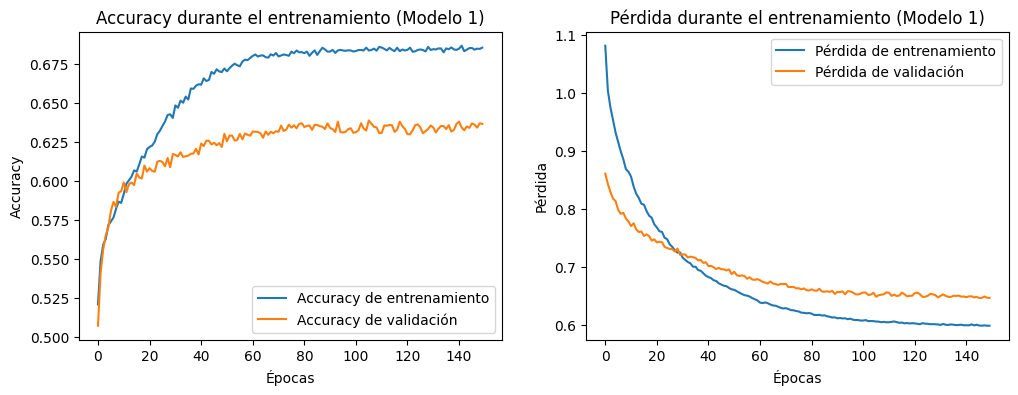

Evaluando batch size: 32, dense layers: 4, learning rate: 1e-05
Accuracy en el conjunto de prueba: 0.6355


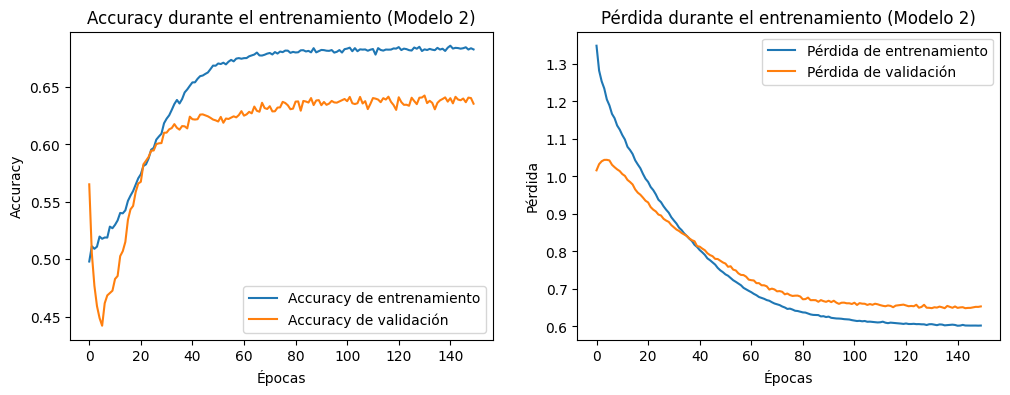

Evaluando batch size: 64, dense layers: 2, learning rate: 1e-05
Accuracy en el conjunto de prueba: 0.6367


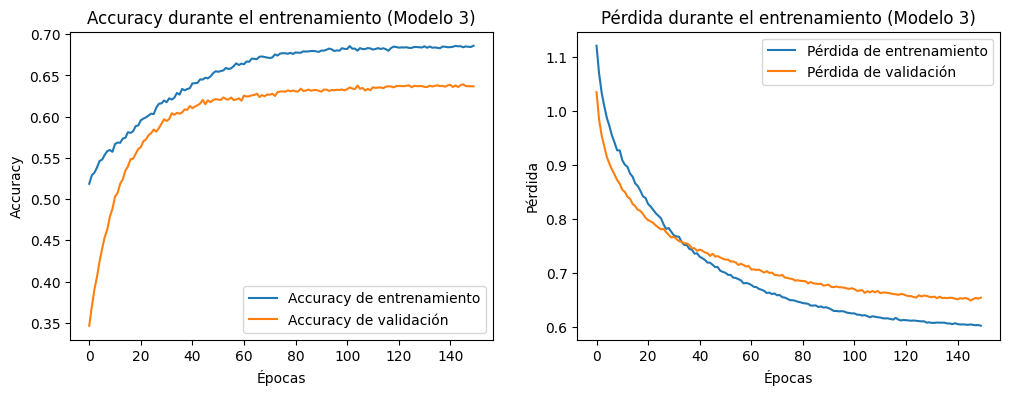

Evaluando batch size: 64, dense layers: 4, learning rate: 1e-05
Accuracy en el conjunto de prueba: 0.6354


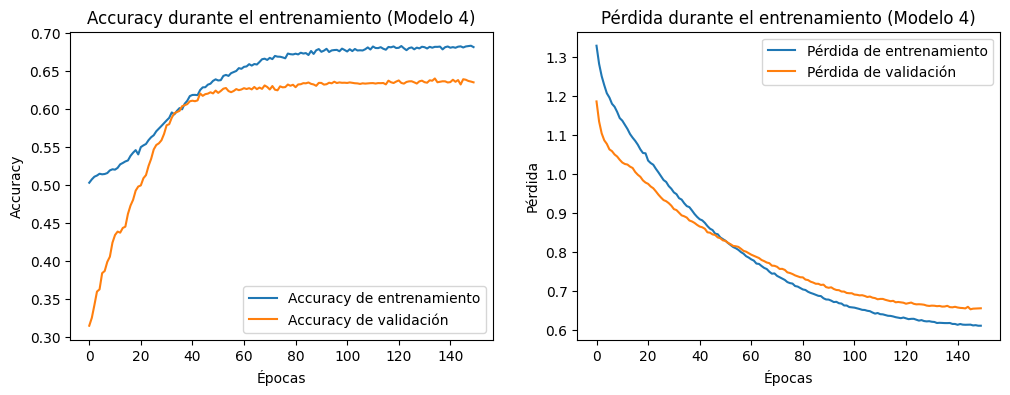

Evaluando batch size: 128, dense layers: 2, learning rate: 1e-05
Accuracy en el conjunto de prueba: 0.6353


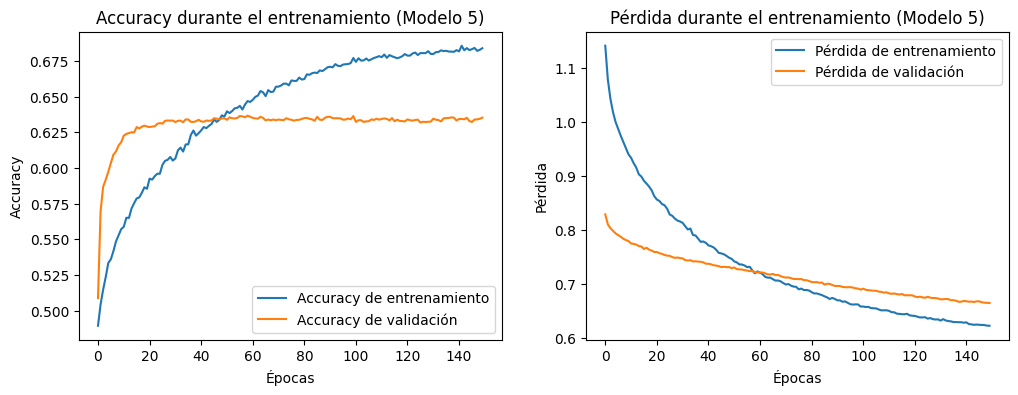

Evaluando batch size: 128, dense layers: 4, learning rate: 1e-05
Accuracy en el conjunto de prueba: 0.6379


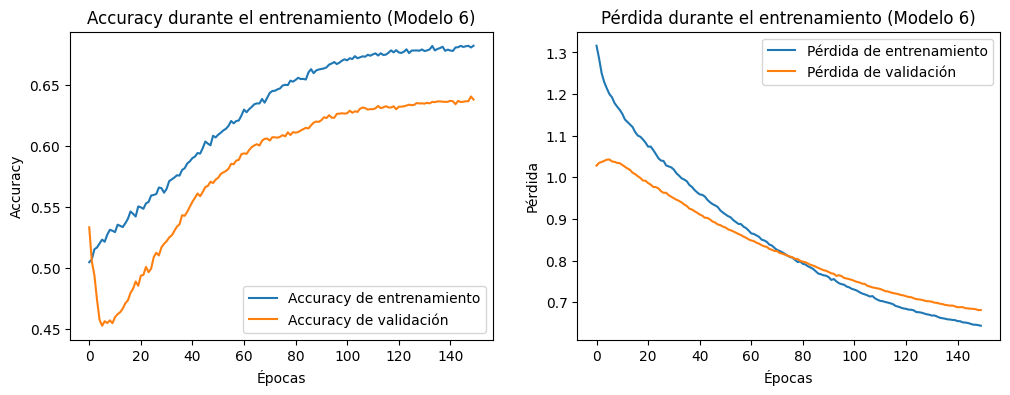

Mejores parámetros: {'batch_size': 128, 'dense_layers': 4, 'learning_rate': 1e-05} con Accuracy: 0.6379


In [40]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Definimos los parámetros a evaluar
batch_sizes = [32, 64, 128]
dense_layers = [2, 4]
learning_rates = [0.00001]

# Inicializamos variables para guardar el mejor resultado
best_accuracy = 0
best_params = {}

model_index = 1
for batch_size in batch_sizes:
    for layers in dense_layers:
        for lr in learning_rates:
            print(f"Evaluando batch size: {batch_size}, dense layers: {layers}, learning rate: {lr}")

            # Crear el modelo con los parámetros actuales
            model_gs = make_model_2(dense_layers=layers, input_dim=X_train_res.shape[1], RMS=lr)

            # Callbacks
            early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
            lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=25)

            # Entrenar el modelo
            history = model_gs.fit(X_train_res, y_train_res, epochs=150, batch_size=batch_size,
                                validation_data=(X_test, y_test), verbose=0,
                                callbacks=[early_stopping, lr_scheduler])

            # Evaluar el modelo en el conjunto de prueba
            loss, accuracy = model_gs.evaluate(X_test, y_test, verbose=0)
            print(f'Accuracy en el conjunto de prueba: {accuracy:.4f}')

            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.plot(history.history['accuracy'], label='Accuracy de entrenamiento')
            plt.plot(history.history['val_accuracy'], label='Accuracy de validación')
            plt.xlabel('Épocas')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.title(f'Accuracy durante el entrenamiento (Modelo {model_index})')

            plt.subplot(1, 2, 2)
            plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
            plt.plot(history.history['val_loss'], label='Pérdida de validación')
            plt.xlabel('Épocas')
            plt.ylabel('Pérdida')
            plt.legend()
            plt.title(f'Pérdida durante el entrenamiento (Modelo {model_index})')
            plt.show()

            # Guardar el mejor resultado
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'batch_size': batch_size,
                    'dense_layers': layers,
                    'learning_rate': lr
                }

            model_index += 1

print(f"Mejores parámetros: {best_params} con Accuracy: {best_accuracy:.4f}")

A pesar de que se sigue produciendo algo de overfitting, a continuación se representan los resultados de la matriz de confusión y mátricas para los mejores parámetros encontrados en esta segunda arquitectura.

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_2 = model_gs.predict(X_test)
y_pred_2 = (y_pred_2>0.5).astype(int)

313/313 [==============================] - 2s 4ms/step


Matriz de Confusión:

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72      6893
           1       0.43      0.53      0.48      3107

    accuracy                           0.64     10000
   macro avg       0.60      0.61      0.60     10000
weighted avg       0.66      0.64      0.65     10000



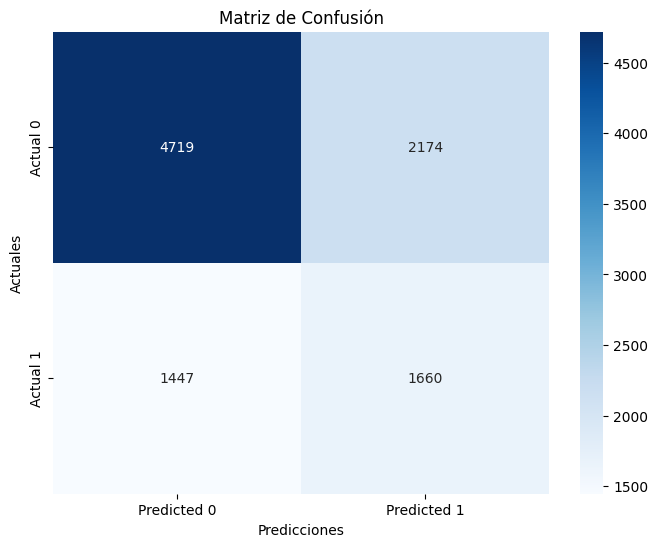

In [42]:
print("Matriz de Confusión:")
cm_2 = confusion_matrix(y_test, y_pred_2)

print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_2))

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicciones')
plt.ylabel('Actuales')
plt.title('Matriz de Confusión')
plt.show()

## Prueba con balanceo por pesos

In [ ]:
X = data_cleaned.drop(columns=target)
y = data_cleaned[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
input_len = X_train.shape[1]
input_len

23

In [ ]:
model_wc = make_model_2(dense_layers=2, input_dim=X_train.shape[1], RMS=0.00001, dense_dropout=0.5)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15)

history = model_wc.fit(X_train, y_train, epochs=200, batch_size=32,
                       validation_data=(X_test, y_test), verbose=0,
                       callbacks=[early_stopping, lr_scheduler],
                       class_weight=class_weights_dict)



Accuracy en el conjunto de prueba: 0.6362


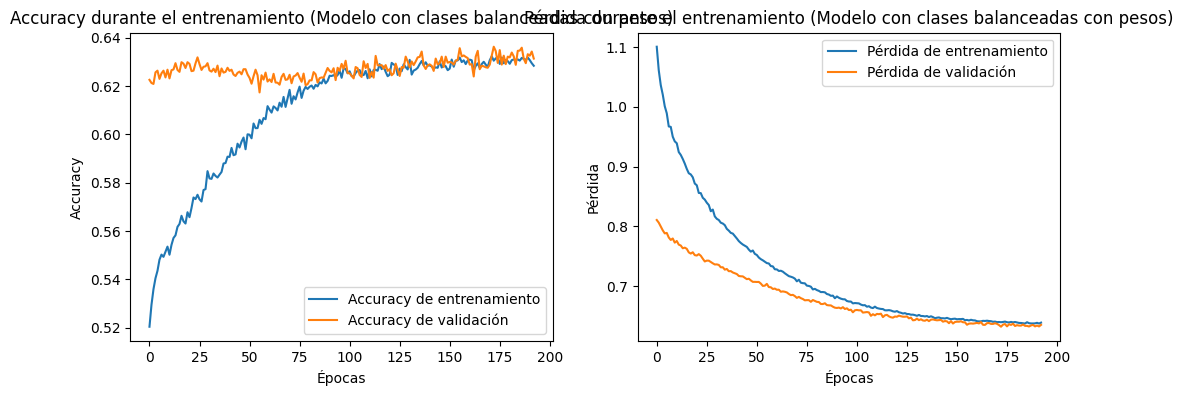

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model_wc.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy en el conjunto de prueba: {accuracy:.4f}')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy de validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title(f'Accuracy durante el entrenamiento (Modelo con clases balanceadas con pesos)')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title(f'Pérdida durante el entrenamiento (Modelo con clases balanceadas con pesos)')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_wc = model_wc.predict(X_test)
y_pred_wc_c = (y_pred_wc>0.5).astype(int)

313/313 [==============================] - 1s 3ms/step


Matriz de Confusión:

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.61      0.70      6899
           1       0.44      0.70      0.54      3101

    accuracy                           0.64     10000
   macro avg       0.63      0.65      0.62     10000
weighted avg       0.70      0.64      0.65     10000



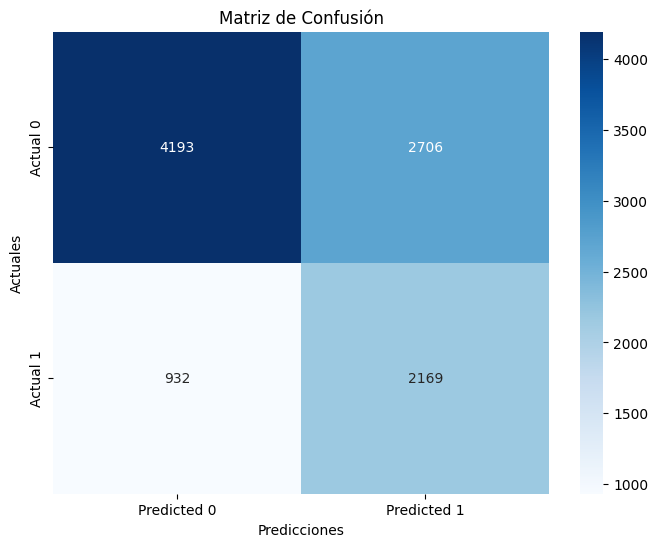

In [ ]:
print("Matriz de Confusión:")
cm_final = confusion_matrix(y_test, y_pred_wc_c)

print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_wc_c))

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicciones')
plt.ylabel('Actuales')
plt.title('Matriz de Confusión')
plt.show()

Es mejor este resultado respecto al anterior ya que aunque la accuracy es la misma, la predicción es mejor al haberse reducido la cantidad de falsos negativos, ha favorecido a la predicción de infecciones, lo cual en este caso es más conveniente.

# Feature Engineering

Las variables `cd40`, `cd420`, `cd820` y `cd80` hacen referencia a diferentes subconjuntos de células T CD4+, que son un tipo de células inmunitarias cruciales en el sistema inmunológico, particularmente en el contexto del VIH.

El caso de las `cd40` y `cd420` están relacionadas con la activación de las células T CD4+ mediante la interacción con la proteína CD40, que es importante en la activación de las células B y las células dendríticas. En el caso de `cd80`y `cd820` están relacionadas con una población de células CD4+ que expresan CD80, una proteína coestimuladora importante en la activación de las células T.

El feature engineering que propongo es el cálculo de ratios y variaciones en el tiempo de están variables.

- Variables que representen el cambio en los valores de CD4 y CD8 entre la línea base y las semanas 20±5. Para capturar la evolución del sistema inmunológico del paciente.
- Ratios entre las medidas de CD4 y CD8 en la línea base y en las semanas 20±5. Para ver cómo han cambiado estos valores relativos entre sí. Para evitar denominadores nulos se suma 1e-5.

In [ ]:
data_fe = data_50000.copy()

In [ ]:
cutoff = 800
data_fe['time_class'] = (data_fe['time'] > cutoff).astype(int)

In [ ]:
data_fe['delta_cd4'] = data_fe['cd420'] - data_fe['cd40']
data_fe['delta_cd8'] = data_fe['cd820'] - data_fe['cd80']


data_fe['total_cd4'] = data_fe['cd40'] + data_fe['cd420']
data_fe['total_cd8'] = data_fe['cd80'] + data_fe['cd820']

data_fe['ratio_cd420_cd40'] = data_fe['cd420'] / (data_fe['cd40'] + 1e-5)
data_fe['ratio_cd820_cd80'] = data_fe['cd820'] / (data_fe['cd80'] + 1e-5)

In [ ]:
def plot_boxplots(df, columns, target, figsize=(10,10)):
  plt.figure(figsize=figsize)
  for i, col in enumerate(columns):
    plt.subplot(len(columns) // 3 + 1, 3, i+1)
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f'{col} vs {target}')
  plt.tight_layout()
  plt.show()

In [ ]:
data_fe.head(2)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,cd80,cd820,infected,time_class,delta_cd4,delta_cd8,total_cd4,total_cd8,ratio_cd420_cd40,ratio_cd820_cd80
0,1073,1,37,79.46339,0,1,0,100,0,1,...,882,754,1,1,147,-128,791,1636,1.456522,0.854875
1,324,0,33,73.02314,0,1,0,90,0,1,...,1035,1525,1,0,407,490,743,2560,3.422619,1.473430


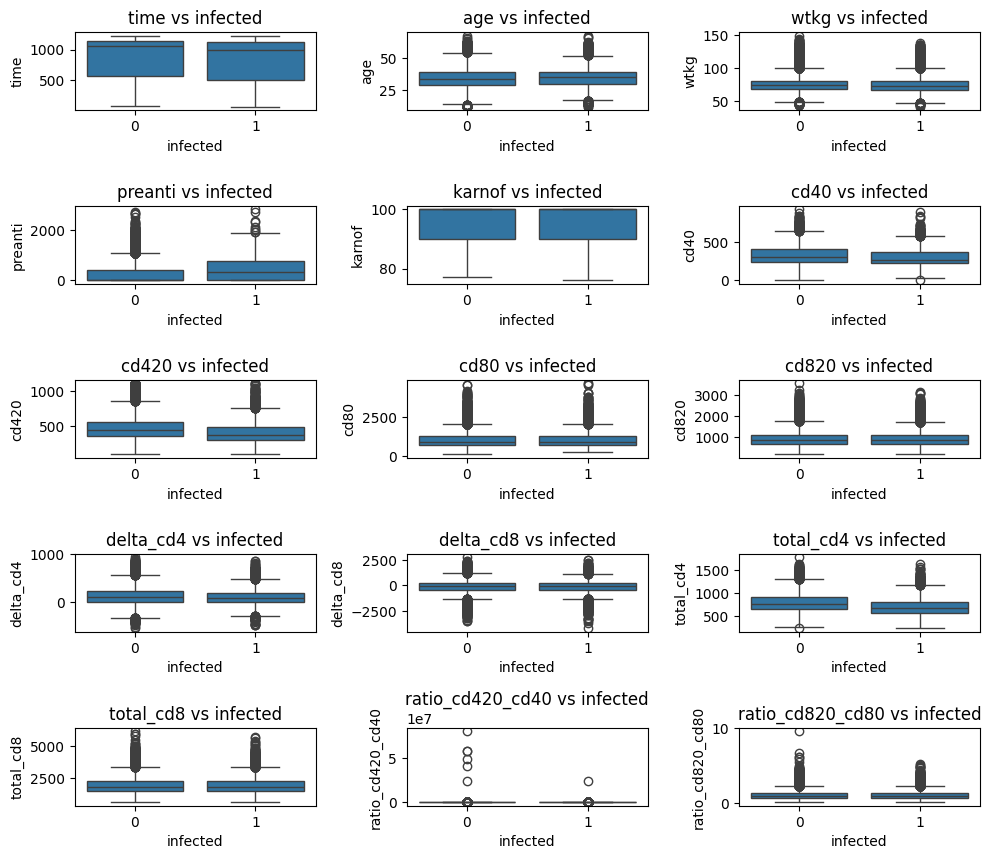

In [ ]:
num_var_fe = ['time', 'age', 'wtkg', 'preanti', 'karnof', 'cd40', 'cd420', 'cd80', 'cd820', 'delta_cd4', 'delta_cd8', 'total_cd4', 'total_cd8', 'ratio_cd420_cd40', 'ratio_cd820_cd80']
plot_boxplots(data_fe, num_var_fe, 'infected')

In [ ]:
vars_to_log_transform = ['preanti', 'cd40', 'cd420', 'cd80', 'cd820', 'total_cd4', 'total_cd8', 'ratio_cd420_cd40', 'ratio_cd820_cd80']
vars_to_cap_floor = ['wtkg', 'delta_cd4', 'delta_cd8']

data_log_transformed_fe = log_transform(data_fe, vars_to_log_transform)
data_cleaned_fe = cap_floor(data_log_transformed_fe, vars_to_cap_floor)

In [ ]:
data_cleaned_fe.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected', 'time_class', 'delta_cd4', 'delta_cd8', 'total_cd4',
       'total_cd8', 'ratio_cd420_cd40', 'ratio_cd820_cd80'],
      dtype='object')

In [ ]:
X = data_cleaned_fe.drop(columns=target)
y = data_cleaned_fe[target]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

infected
0    27650
1    12350
Name: count, dtype: int64

In [ ]:
y_train_res.value_counts()

infected
1    27650
0    27650
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [ ]:
model_final = make_model_2(dense_layers=2, input_dim=X_train_res.shape[1], RMS=0.00001)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15)

history = model_final.fit(X_train_res, y_train_res, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), verbose=0,
                    callbacks=[early_stopping, lr_scheduler])



Accuracy en el conjunto de prueba: 0.6436


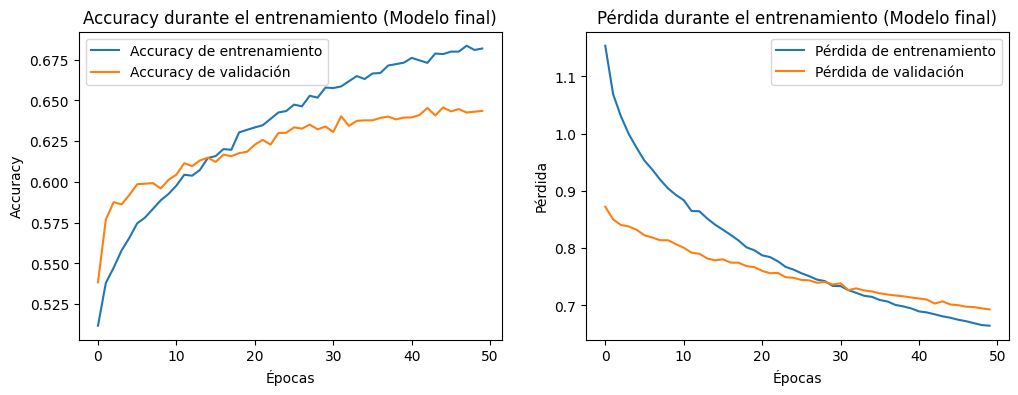

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model_final.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy en el conjunto de prueba: {accuracy:.4f}')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy de validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title(f'Accuracy durante el entrenamiento (Modelo final)')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title(f'Pérdida durante el entrenamiento (Modelo final)')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_final = model_final.predict(X_test)
y_pred_final_labels = (y_pred_final>0.5).astype(int)

313/313 [==============================] - 1s 3ms/step


Matriz de Confusión:

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      6844
           1       0.44      0.52      0.48      3156

    accuracy                           0.64     10000
   macro avg       0.60      0.61      0.60     10000
weighted avg       0.66      0.64      0.65     10000



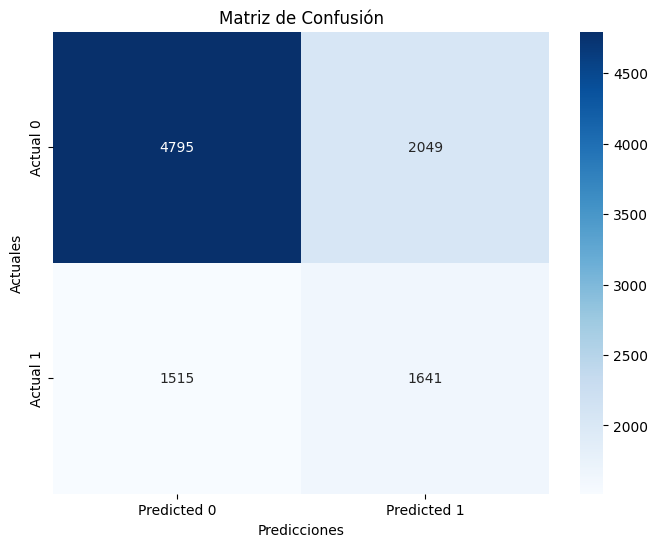

In [ ]:
print("Matriz de Confusión:")
cm_final = confusion_matrix(y_test, y_pred_final_labels)

print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_final_labels))

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicciones')
plt.ylabel('Actuales')
plt.title('Matriz de Confusión')
plt.show()

En la prueba sin feature engineering, con el modelo elegido se obtenía una accuracy en el conjunto de prueba de 0.6427. Tras realizar feature engineering, esta métrica a mejorado muy poco.

# Conclusión


Viendo los diferentes resutlados obtenidos, podemos determinar que no se ha mejorado la precisión con las redes neuronales respecto a los modelos de random forest o XGBoost. Sin embargo, en este caso, en la práctica, hay que evaluar desde otros puntos de vista también. Para este caso en el que se busca detectar casos con AIDS que estén infectados por VIH, no solamente hay que buscar la máxima exactitud, hay que tener en cuenta que es mejor más predicciones en exceso que falta de predicciones de infección real. Es decir, es mejor tener más falsos positivos que falsos negativos. Teniendo en cuenta esta premisa, las redes neuronales parecen ser mejores en este enfoque, y concretamente al balancear los pesos en lugar de utilizar la técnica de SMOTE se reduce la cantidad de falsos negativos. Serían necesarios más datos y estudiar el refinamiento del modelo de RF o de XGBoost para obtener mejores resultados con estos modelos también.

In [1]:
# import nbformat
# from nbconvert import HTMLExporter
# from nbconvert.preprocessors import TagRemovePreprocessor

# # Nombre del archivo del notebook
# notebook_filename = 'VIHinfection_Classification.ipynb'

# # Lee el notebook
# with open(notebook_filename) as f:
#     notebook_content = nbformat.read(f, as_version=4)

# # Configura el exportador de HTML
# html_exporter = HTMLExporter()
# html_exporter.template_name = 'classic'

# # Configura el preprocesador para eliminar celdas con etiquetas específicas
# preprocessor = TagRemovePreprocessor(remove_cell_tags=['hide'])
# html_exporter.register_preprocessor(preprocessor, enabled=True)

# # Convierte el notebook a HTML
# (body, resources) = html_exporter.from_notebook_node(notebook_content)

# # Guarda el archivo HTML
# html_filename = notebook_filename.replace('.ipynb', '.html')
# with open(html_filename, 'w') as f:
#     f.write(body)

# print(f'Notebook convertido a HTML y guardado como {html_filename}')

Notebook convertido a HTML y guardado como VIHinfection_Classification.html
